In [1]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)


df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

# Data description

In [3]:
df.select_dtypes(include=["number"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Categorical features are:

In [4]:
df.select_dtypes(exclude=["number"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Statistical analysis

In [5]:
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     77     1168        1168      1168      1168      1168         1168   
unique     2        4           4         1         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      41      740        1046      1168       842      1105          182   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1168       1168     1168       1168  1168.000000  1168.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1005       1154      981        578          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.104452     5.595890   
std           NaN        NaN      NaN        NaN     1.390153     1.124343   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1168.000000   1168.000000      1168     1168        1168        1168   
unique          NaN           NaN         6        8          14          15   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN       915     1144         396         387   
mean    1970.930651   1984.758562       NaN      NaN         NaN         NaN   
std       30.145255     20.785185       NaN      NaN         NaN         NaN   
min     1875.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1966.000000       NaN      NaN         NaN         NaN   
50%     1972.000000   1993.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1161  1161.000000      1168      1168       1168     1138   
unique          4          NaN         4         

1.Null values present in:

LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,

2.The null values are very high in columns, which can be dropped:

Alley,PoolQC,Fence,MiscFeature

3.Outliers present in many columns

4.Columns having 1 unique value which can be dropped:Utilities

# Feature engineering

In [6]:
#renaming
df.rename(columns = {'MSSubClass':'type of dwelling'}, inplace = True)
df.rename(columns = {'MSZoning':'general zoning classification'}, inplace = True)
df.rename(columns = {'LotFrontage':'Linear feet of street connected to property'}, inplace = True)
df.rename(columns = {'LotArea':'Lot size in square feet'}, inplace = True)
df.rename(columns = {'Street':'Type of road access to property'}, inplace = True)
df.rename(columns = {'LotShape':'General shape of property'}, inplace = True)
df.rename(columns = {'LandContour':'Flatness of the property'}, inplace = True)
df.rename(columns = {'LotConfig':'Lot configuration'}, inplace = True)

In [7]:
df.rename(columns = {'LandSlope':'Slope of property'}, inplace = True)
df.rename(columns = {'Neighborhood':'Physical locations within Ames city limits'}, inplace = True)
df.rename(columns = {'Condition1':'Proximity to various conditions'}, inplace = True)
df.rename(columns = {'Condition2':'Proximity to various conditions (if more than one is present)'}, inplace = True)
df.rename(columns = {'BldgType':'Type of dwelling'}, inplace = True)
df.rename(columns = {'HouseStyle':'Style of dwelling'}, inplace = True)
df.rename(columns = {'OverallQual YearRemodAdd':'Remodel date'}, inplace = True)
df.rename(columns = {'RoofStyle':'Type of roof'}, inplace = True)
df.rename(columns = {'RoofMatl':'Roof material'}, inplace = True)
df.rename(columns = {'Exterior1st':'Exterior covering on house'}, inplace = True)

In [8]:
df.rename(columns = {'Exterior2nd':'Exterior covering on house (if more than one material)'}, inplace = True)
df.rename(columns = {'MasVnrType':'Physical locations within Ames city limits'}, inplace = True)
df.rename(columns = {'Condition1':'Proximity to various conditions'}, inplace = True)
df.rename(columns = {'Condition2':'Proximity to various conditions (if more than one is present)'}, inplace = True)
df.rename(columns = {'MasVnrType':'Masonry veneer type'}, inplace = True)
df.rename(columns = {'MasVnrArea':'Masonry veneer area in square feet'}, inplace = True)
df.rename(columns = {'ExterQual':'quality of the material on the exterior'}, inplace = True)
df.rename(columns = {'ExterCond':'present condition of the material on the exterior'}, inplace = True)
df.rename(columns = {'Foundation':'Type of foundation'}, inplace = True)
df.rename(columns = {'BsmtQual':'Evaluates the height of the basement'}, inplace = True)

In [9]:
df.rename(columns = {'BsmtCond':'general condition of the basement'}, inplace = True)
df.rename(columns = {'BsmtExposure':'walkout or garden level walls'}, inplace = True)
df.rename(columns = {'BsmtFinType1':'Rating of basement finished area'}, inplace = True)
df.rename(columns = {'BsmtFinSF1':'Type 1 finished square feet'}, inplace = True)
df.rename(columns = {'BsmtFinType2':'Rating of basement finished area (if multiple types)'}, inplace = True)
df.rename(columns = {'BsmtFinSF2':'Type 2 finished square feet'}, inplace = True)
df.rename(columns = {'TotalBsmtSF':'Total square feet of basement area'}, inplace = True)
df.rename(columns = {'BsmtUnfSF':'Unfinished square feet of basement area'}, inplace = True)
df.rename(columns = {'Heating':'Type of heating'}, inplace = True)
df.rename(columns = {'HeatingQC':'Heating quality and condition'}, inplace = True)
df.rename(columns = {'CentralAir':'Central air conditioning'}, inplace = True)

In [10]:
df.rename(columns = {'Electrical':'Electrical system'}, inplace = True)
df.rename(columns = {'1stFlrSF':'First Floor square feet'}, inplace = True)
df.rename(columns = {'2ndFlrSF':'Second floor square feet'}, inplace = True)
df.rename(columns = {'LowQualFinSF':'Low quality finished square feet all floors'}, inplace = True)
df.rename(columns = {'GrLivArea':'Above grade (ground) living area square feet'}, inplace = True)
df.rename(columns = {'BsmtFullBath':'Basement full bathrooms'}, inplace = True)
df.rename(columns = {'BsmtHalfBath':'Basement half bathrooms'}, inplace = True)
df.rename(columns = {'FullBath':'Full bathrooms above grade'}, inplace = True)
df.rename(columns = {'HalfBath':'Half baths above grade'}, inplace = True)
df.rename(columns = {'Bedroom':'Bedrooms above grade does NOT include basement bedrooms'}, inplace = True)

In [11]:
df.rename(columns = {'Kitchen':'Kitchens above grade'}, inplace = True)
df.rename(columns = {'KitchenQual':'Kitchen quality'}, inplace = True)
df.rename(columns = {'TotRmsAbvGrd':'Total rooms above grade (does not include bathrooms'}, inplace = True)
df.rename(columns = {'Functional':'Home functionality '}, inplace = True)
df.rename(columns = {'Fireplaces':'Number of fireplaces'}, inplace = True)
df.rename(columns = {'FireplaceQu':'Fireplace quality'}, inplace = True)
df.rename(columns = {'GarageType':'Garage location'}, inplace = True)
df.rename(columns = {'GarageYrBlt':'Year garage was built'}, inplace = True)
df.rename(columns = {'GarageFinish':'Interior finish of the garage'}, inplace = True)
df.rename(columns = {'GarageCars':'Size of garage in car capacity'}, inplace = True)

In [12]:
df.rename(columns = {'GarageArea':'Size of garage in square feet'}, inplace = True)
df.rename(columns = {'GarageQual':'Garage quality'}, inplace = True)
df.rename(columns = {'GarageCond':'Garage condition'}, inplace = True)
df.rename(columns = {'Functional':'Home functionality '}, inplace = True)
df.rename(columns = {'WoodDeckSF':'Wood deck area'}, inplace = True)
df.rename(columns = {'EnclosedPorch':'Enclosed porch area'}, inplace = True)
df.rename(columns = {'3SsnPorch':'Three season porch area'}, inplace = True)
df.rename(columns = {'ScreenPorch':'Screen porch area in square feet'}, inplace = True)
df.rename(columns = {'PoolArea':'Pool area in square feet'}, inplace = True)
df.rename(columns = {'PoolQC':'Pool quality'}, inplace = True)

In [13]:
df.rename(columns = {'MiscVal':'Value of miscellaneous feature'}, inplace = True)
df.rename(columns = {'MoSold':'Month Sold'}, inplace = True)
df.rename(columns = {'YrSold':'Year Sold'}, inplace = True)
df.rename(columns = {'SaleType':'Type of sale'}, inplace = True)
df.rename(columns = {'SaleCondition':'Condition of sale'}, inplace = True)

In [14]:
df.columns

Index(['Id', 'type of dwelling', 'general zoning classification',
       'Linear feet of street connected to property',
       'Lot size in square feet', 'Type of road access to property', 'Alley',
       'General shape of property', 'Flatness of the property', 'Utilities',
       'Lot configuration', 'Slope of property',
       'Physical locations within Ames city limits',
       'Proximity to various conditions',
       'Proximity to various conditions (if more than one is present)',
       'Type of dwelling', 'Style of dwelling', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Type of roof', 'Roof material',
       'Exterior covering on house',
       'Exterior covering on house (if more than one material)',
       'Physical locations within Ames city limits',
       'Masonry veneer area in square feet',
       'quality of the material on the exterior',
       'present condition of the material on the exterior',
       'Type of foundation', 'Evaluates the height o

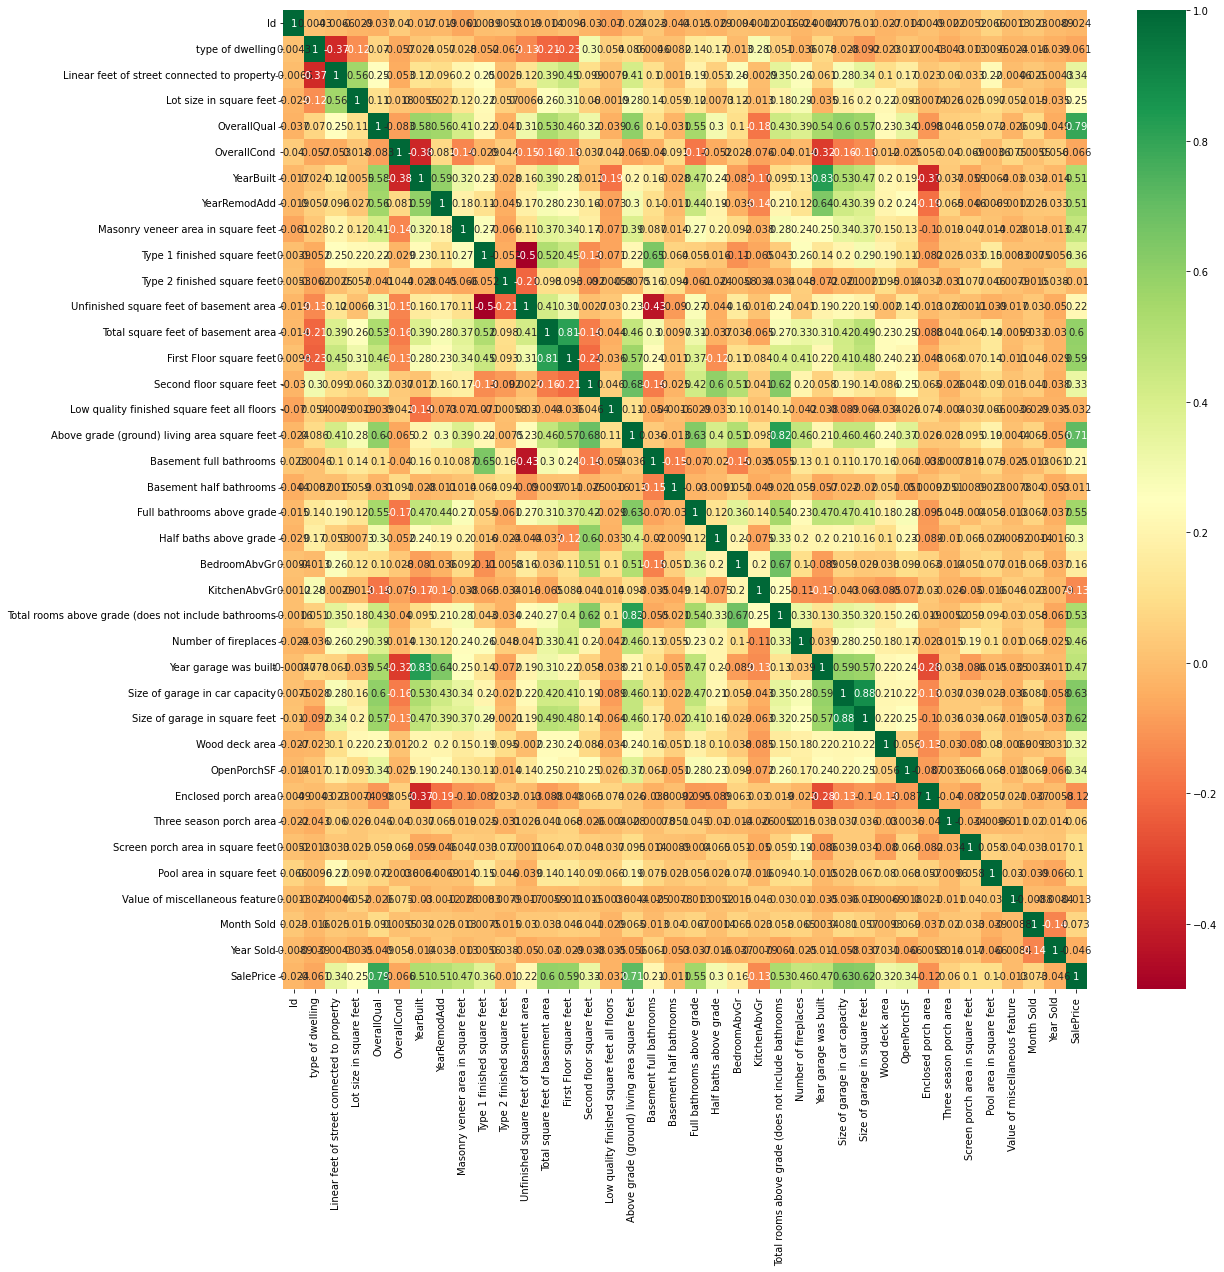

In [15]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [16]:
df.head(5)

Id  type of dwelling general zoning classification  \
0  127               120                            RL   
1  889                20                            RL   
2  793                60                            RL   
3  110                20                            RL   
4  422                20                            RL   

   Linear feet of street connected to property  Lot size in square feet  \
0                                          NaN                     4928   
1                                         95.0                    15865   
2                                         92.0                     9920   
3                                        105.0                    11751   
4                                          NaN                    16635   

  Type of road access to property Alley General shape of property  \
0                            Pave   NaN                       IR1   
1                            Pave   NaN                       IR1   
2                            Pave   NaN                       IR1   
3                            Pave   NaN                       IR1   
4                            Pave   NaN                       IR1   

  Flatness of the property Utilities Lot configuration Slope of property  \
0                      Lvl    AllPub            Inside               Gtl   
1                      Lvl    AllPub            Inside               Mod   
2                      Lvl    AllPub           CulDSac               Gtl   
3                      Lvl    AllPub            Inside               Gtl   
4                      Lvl    AllPub               FR2               Gtl   

  Physical locations within Ames city limits Proximity to various conditions  \
0                                    NPkVill                            Norm   
1                                      NAmes                            Norm   
2                                    NoRidge                            Norm   
3                                     NWAmes                            Norm   
4                                     NWAmes                            Norm   

  Proximity to various conditions (if more than one is present)  \
0                                               Norm              
1                                               Norm              
2                                               Norm              
3                                               Norm              
4                                               Norm              

  Type of dwelling Style of dwelling  OverallQual  OverallCond  YearBuilt  \
0           TwnhsE            1Story            6            5       1976   
1             1Fam            1Story            8            6       1970   
2             1Fam            2Story            7            5       1996   
3             1Fam            1Story            6            6       1977   
4             1Fam            1Story            6            7       1977   

   YearRemodAdd Type of roof Roof material Exterior covering on house  \
0          1976        Gable       CompShg                    Plywood   
1          1970         Flat       Tar&Grv                    Wd Sdng   
2          1997        Gable       CompShg                    MetalSd   
3          1977          Hip       CompShg                    Plywood   
4          2000        Gable       CompShg                    CemntBd   

  Exterior covering on house (if more than one material)  \
0                                            Plywood       
1                                            Wd Sdng       
2                                            MetalSd       
3                                            Plywood       
4                                            CmentBd       

  Physical locations within Ames city limits  \
0                                       None   
1                                       None   
2                                       N

In [17]:
#removing column with single unique value
df.drop(["Utilities"], axis = 1, inplace = True)

In [18]:
#removing unnecessary column
df.drop(["Id"], axis = 1, inplace = True)

In [19]:
#Removing columsn with very high Nan values-Alley,PoolQC,Fence,MiscFeature
df.drop(["Alley"], axis = 1, inplace = True)
df.drop(["Pool quality"], axis = 1, inplace = True)
df.drop(["Fence"], axis = 1, inplace = True)
df.drop(["MiscFeature"], axis = 1, inplace = True)
df.drop(["Physical locations within Ames city limits"], axis = 1, inplace = True)

In [20]:
df["type of dwelling"].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: type of dwelling, dtype: int64

In [21]:
df["OverallQual"].value_counts()

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

In [22]:
df["OverallCond"].value_counts()

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

In [23]:
df["YearBuilt"].value_counts()

2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1927     1
1911     1
2010     1
1892     1
1913     1
Name: YearBuilt, Length: 110, dtype: int64

In [24]:
df["YearRemodAdd"].value_counts()

1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
1984      5
1951      4
1983      4
1952      4
1974      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [25]:
df["Low quality finished square feet all floors"].value_counts()

0      1145
80        3
360       2
384       1
420       1
473       1
371       1
232       1
513       1
481       1
515       1
514       1
120       1
528       1
572       1
144       1
234       1
390       1
156       1
53        1
392       1
Name: Low quality finished square feet all floors, dtype: int64

In [26]:
df["Basement full bathrooms"].value_counts()

0    686
1    468
2     13
3      1
Name: Basement full bathrooms, dtype: int64

In [27]:
df["Basement half bathrooms"].value_counts()


0    1105
1      61
2       2
Name: Basement half bathrooms, dtype: int64

In [28]:
df["Full bathrooms above grade"].value_counts()

2    610
1    524
3     27
0      7
Name: Full bathrooms above grade, dtype: int64

In [29]:
df["Half baths above grade"].value_counts()

0    724
1    434
2     10
Name: Half baths above grade, dtype: int64

In [30]:
df["BedroomAbvGr"].value_counts()

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64

In [31]:
df["KitchenAbvGr"].value_counts()

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64

In [32]:
df["Total rooms above grade (does not include bathrooms"].value_counts()

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: Total rooms above grade (does not include bathrooms, dtype: int64

In [33]:
df["Number of fireplaces"].value_counts()

0    551
1    518
2     94
3      5
Name: Number of fireplaces, dtype: int64

In [34]:
df["Size of garage in car capacity"].value_counts()

2    665
1    288
3    147
0     64
4      4
Name: Size of garage in car capacity, dtype: int64

In [35]:
df["Enclosed porch area"].value_counts()

0      999
112     13
96       6
192      5
216      5
      ... 
80       1
242      1
136      1
272      1
172      1
Name: Enclosed porch area, Length: 106, dtype: int64

In [36]:
df["Three season porch area"].value_counts()

0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: Three season porch area, dtype: int64

In [37]:
df["Screen porch area in square feet"].value_counts()

0      1073
192       5
224       5
189       4
180       3
       ... 
273       1
99        1
122       1
80        1
130       1
Name: Screen porch area in square feet, Length: 65, dtype: int64

In [38]:
df["Pool area in square feet"].value_counts()

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: Pool area in square feet, dtype: int64

In [39]:
df["Value of miscellaneous feature"].value_counts()

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: Value of miscellaneous feature, dtype: int64

In [40]:
df["Month Sold"].value_counts()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: Month Sold, dtype: int64

In [41]:
df["Year Sold"].value_counts()

2007    264
2009    260
2006    254
2008    248
2010    142
Name: Year Sold, dtype: int64

In [42]:
cat_cols=df.drop(["Linear feet of street connected to property","Lot size in square feet","Masonry veneer area in square feet","Type 1 finished square feet","Type 2 finished square feet","Unfinished square feet of basement area","Total square feet of basement area","First Floor square feet","Second floor square feet","Above grade (ground) living area square feet","Size of garage in square feet","Wood deck area","OpenPorchSF","SalePrice"],axis=1)

In [43]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column                                  value          
Central air conditioning                N            78
                                        Y          1090
Condition of sale                       AdjLand       4
                                        Alloca       12
                                        Family       18
...                                                 ...
quality of the material on the exterior TA          717
walkout or garden level walls           Mn           93
                                        Gd          108
                                        Av          180
                                        No          756

[206 rows x 1 columns]

# EDA

In [44]:
#removing duplicate values
df.drop_duplicates(inplace=True)

In [45]:
#number of columns with nan
df.isna().sum().sum()

1244

In [46]:
print(df["Basement full bathrooms"].isna().sum())
print(df["Basement half bathrooms"].isna().sum())
print(df["Full bathrooms above grade"].isna().sum())
print(df["Half baths above grade"].isna().sum())

print(df["BedroomAbvGr"].isna().sum())
print(df["KitchenAbvGr"].isna().sum())
print(df["Number of fireplaces"].isna().sum())
print(df["Low quality finished square feet all floors"].isna().sum())

0
0
0
0
0
0
0
0


In [47]:
# replacing all 0 with Nan

#finding columns having 0
zero_columns=pd.DataFrame(df.columns[df.isin([0]).any()])
pd.set_option('display.max_rows', None)
print(zero_columns)
print(zero_columns.info())

                                              0
0            Masonry veneer area in square feet
1                   Type 1 finished square feet
2                   Type 2 finished square feet
3       Unfinished square feet of basement area
4            Total square feet of basement area
5                      Second floor square feet
6   Low quality finished square feet all floors
7                       Basement full bathrooms
8                       Basement half bathrooms
9                    Full bathrooms above grade
10                       Half baths above grade
11                                 BedroomAbvGr
12                                 KitchenAbvGr
13                         Number of fireplaces
14               Size of garage in car capacity
15                Size of garage in square feet
16                               Wood deck area
17                                  OpenPorchSF
18                          Enclosed porch area
19                      Three season por

In [48]:
#finding percentage of 0 values present
df.loc[:,list(df.loc[:,df.isin([0]).any()].columns)].isin([0]).sum()/(len(df))*100

Masonry veneer area in square feet             59.246575
Type 1 finished square feet                    32.106164
Type 2 finished square feet                    88.356164
Unfinished square feet of basement area         8.304795
Total square feet of basement area              2.568493
Second floor square feet                       56.763699
Low quality finished square feet all floors    98.030822
Basement full bathrooms                        58.732877
Basement half bathrooms                        94.606164
Full bathrooms above grade                      0.599315
Half baths above grade                         61.986301
BedroomAbvGr                                    0.342466
KitchenAbvGr                                    0.085616
Number of fireplaces                           47.174658
Size of garage in car capacity                  5.479452
Size of garage in square feet                   5.479452
Wood deck area                                 51.626712
OpenPorchSF                    

In [49]:
#finding percentage of 0 values present
df.loc[:,list(df.loc[:,df.isin([0]).any()].columns)].isin([0]).sum()/(len(df))*100

Masonry veneer area in square feet             59.246575
Type 1 finished square feet                    32.106164
Type 2 finished square feet                    88.356164
Unfinished square feet of basement area         8.304795
Total square feet of basement area              2.568493
Second floor square feet                       56.763699
Low quality finished square feet all floors    98.030822
Basement full bathrooms                        58.732877
Basement half bathrooms                        94.606164
Full bathrooms above grade                      0.599315
Half baths above grade                         61.986301
BedroomAbvGr                                    0.342466
KitchenAbvGr                                    0.085616
Number of fireplaces                           47.174658
Size of garage in car capacity                  5.479452
Size of garage in square feet                   5.479452
Wood deck area                                 51.626712
OpenPorchSF                    

In [50]:
#Replacing 0 with mean of the column
df["Masonry veneer area in square feet"]=df["Masonry veneer area in square feet"].replace(0.0,df["Masonry veneer area in square feet"].mean())
df["Masonry veneer area in square feet"].value_counts()

102.310078     692
72.000000        7
180.000000       6
120.000000       6
106.000000       5
84.000000        5
108.000000       5
80.000000        5
336.000000       4
320.000000       4
100.000000       4
246.000000       4
160.000000       4
340.000000       4
178.000000       4
360.000000       4
288.000000       4
168.000000       4
300.000000       4
216.000000       4
40.000000        4
210.000000       4
132.000000       4
16.000000        4
220.000000       4
104.000000       3
170.000000       3
128.000000       3
174.000000       3
200.000000       3
82.000000        3
99.000000        3
252.000000       3
70.000000        3
256.000000       3
208.000000       3
186.000000       3
130.000000       3
110.000000       3
350.000000       3
85.000000        3
183.000000       3
456.000000       3
158.000000       2
312.000000       2
306.000000       2
117.000000       2
44.000000        2
344.000000       2
272.000000       2
145.000000       2
305.000000       2
205.000000  

In [51]:
#Replacing 0 with mean of the column
df["Type 1 finished square feet"]=df["Type 1 finished square feet"].replace(0,df["Masonry veneer area in square feet"].mean())
df["Type 1 finished square feet"].value_counts()

163.290761     375
24.000000       10
16.000000        8
20.000000        5
616.000000       5
560.000000       4
504.000000       4
655.000000       4
600.000000       4
641.000000       4
662.000000       4
553.000000       4
569.000000       3
312.000000       3
633.000000       3
375.000000       3
674.000000       3
1200.000000      3
338.000000       3
660.000000       3
182.000000       3
547.000000       3
789.000000       3
428.000000       3
936.000000       3
336.000000       3
697.000000       3
643.000000       3
1201.000000      3
686.000000       3
507.000000       3
120.000000       3
28.000000        3
210.000000       3
767.000000       3
340.000000       3
685.000000       3
400.000000       3
288.000000       3
442.000000       3
456.000000       3
588.000000       3
360.000000       3
168.000000       3
300.000000       3
626.000000       3
733.000000       3
672.000000       3
505.000000       2
513.000000       2
378.000000       2
250.000000       2
706.000000  

In [52]:
#Replacing 0 with mean of the column
df["Unfinished square feet of basement area"]=df["Unfinished square feet of basement area"].replace(0,df["Unfinished square feet of basement area"].mean())
df["Unfinished square feet of basement area"].value_counts()

569.721747     97
728.000000      8
440.000000      6
600.000000      6
300.000000      6
625.000000      6
270.000000      6
672.000000      6
572.000000      5
162.000000      5
108.000000      5
816.000000      5
216.000000      5
390.000000      5
384.000000      4
264.000000      4
340.000000      4
912.000000      4
88.000000       4
276.000000      4
312.000000      4
280.000000      4
360.000000      4
747.000000      4
125.000000      4
780.000000      4
319.000000      4
884.000000      4
326.000000      4
684.000000      4
168.000000      4
392.000000      4
36.000000       4
408.000000      3
697.000000      3
336.000000      3
434.000000      3
80.000000       3
588.000000      3
546.000000      3
350.000000      3
700.000000      3
248.000000      3
660.000000      3
756.000000      3
448.000000      3
92.000000       3
628.000000      3
133.000000      3
611.000000      3
490.000000      3
554.000000      3
186.000000      3
594.000000      3
710.000000      3
163.000000

In [53]:
df["Total square feet of basement area"]=df["Total square feet of basement area"].replace(0,df["Total square feet of basement area"].mean())
df["Total square feet of basement area"].value_counts()

1061.095034    30
864.000000     28
912.000000     13
672.000000     13
816.000000     12
1040.000000    11
728.000000     10
832.000000     10
780.000000     10
894.000000      9
768.000000      8
756.000000      7
936.000000      7
848.000000      7
720.000000      7
1008.000000     7
600.000000      6
1056.000000     6
952.000000      6
1144.000000     5
1092.000000     5
960.000000      5
630.000000      5
992.000000      5
1362.000000     5
1392.000000     5
483.000000      5
880.000000      4
684.000000      4
970.000000      4
858.000000      4
876.000000      4
796.000000      4
804.000000      4
1440.000000     4
924.000000      4
747.000000      4
793.000000      4
884.000000      4
686.000000      4
784.000000      4
1080.000000     4
896.000000      4
910.000000      4
588.000000      4
616.000000      4
1050.000000     4
840.000000      4
735.000000      4
1494.000000     4
764.000000      4
1728.000000     4
1188.000000     4
1478.000000     3
1196.000000     3
916.000000

In [54]:
df["Second floor square feet"]=df["Second floor square feet"].replace(0,df["Second floor square feet"].mean())
df["Second floor square feet"].value_counts()

348.826199     663
728.000000       9
504.000000       7
600.000000       6
672.000000       6
546.000000       6
862.000000       5
689.000000       5
720.000000       5
840.000000       4
896.000000       4
878.000000       4
832.000000       3
880.000000       3
702.000000       3
1254.000000      3
866.000000       3
742.000000       3
677.000000       3
756.000000       3
780.000000       3
684.000000       3
804.000000       3
729.000000       3
551.000000       3
846.000000       3
741.000000       3
915.000000       3
807.000000       3
668.000000       3
793.000000       3
596.000000       3
888.000000       3
765.000000       2
876.000000       2
432.000000       2
941.000000       2
783.000000       2
1101.000000      2
550.000000       2
744.000000       2
576.000000       2
568.000000       2
530.000000       2
755.000000       2
871.000000       2
685.000000       2
790.000000       2
472.000000       2
1320.000000      2
1140.000000      2
709.000000       2
764.000000  

In [55]:
#replacing with mode
df["Basement full bathrooms"]=df["Basement full bathrooms"].replace(0,df["Basement full bathrooms"].mode()[0])
df["Basement full bathrooms"].value_counts()

0    686
1    468
2     13
3      1
Name: Basement full bathrooms, dtype: int64

In [56]:
#Full bathrooms above grade
df["Full bathrooms above grade"].value_counts()

2    610
1    524
3     27
0      7
Name: Full bathrooms above grade, dtype: int64

In [57]:
#Half baths above grade
df["Half baths above grade"]=df["Half baths above grade"].replace(0,df["Half baths above grade"].mode()[0])
df["Half baths above grade"].value_counts()

0    724
1    434
2     10
Name: Half baths above grade, dtype: int64

In [58]:
#Bedrooms above grade (does NOT include basement bedrooms)
df["BedroomAbvGr"]=df["BedroomAbvGr"].replace(0,df["BedroomAbvGr"].mode()[0])
df["BedroomAbvGr"].value_counts()

3    644
2    281
4    180
1     39
5     18
6      5
8      1
Name: BedroomAbvGr, dtype: int64

In [59]:
#Kitchens above gradedf["KitchenAbvGr"]=df["KitchenAbvGr"].replace(0,df["KitchenAbvGr"].mode()[0])
df["KitchenAbvGr"].value_counts()

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64

In [60]:
df["Number of fireplaces"]=df["Number of fireplaces"].replace(0,df["Number of fireplaces"].mode()[0])
df["Number of fireplaces"].value_counts()

0    551
1    518
2     94
3      5
Name: Number of fireplaces, dtype: int64

In [61]:
df["Size of garage in car capacity"]=df["Size of garage in car capacity"].replace(0,df["Size of garage in car capacity"].mean())
df["Size of garage in car capacity"].value_counts()

2.000000    665
1.000000    288
3.000000    147
1.776541     64
4.000000      4
Name: Size of garage in car capacity, dtype: int64

In [62]:
df["Size of garage in square feet"]=df["Size of garage in square feet"].replace(0,df["Size of garage in square feet"].mean())
df["Size of garage in square feet"].value_counts()

476.860445     64
440.000000     44
576.000000     39
240.000000     31
528.000000     26
484.000000     22
288.000000     22
400.000000     21
480.000000     20
308.000000     17
264.000000     15
420.000000     14
280.000000     12
672.000000     12
336.000000     10
352.000000     10
462.000000     10
564.000000      9
504.000000      9
180.000000      9
360.000000      9
540.000000      8
550.000000      8
312.000000      8
572.000000      8
660.000000      8
648.000000      7
520.000000      7
300.000000      7
216.000000      7
588.000000      7
840.000000      6
286.000000      6
546.000000      6
539.000000      6
624.000000      6
396.000000      6
432.000000      6
492.000000      6
461.000000      6
474.000000      6
460.000000      5
384.000000      5
500.000000      5
530.000000      5
506.000000      5
390.000000      5
527.000000      5
490.000000      5
720.000000      5
529.000000      5
380.000000      5
252.000000      5
431.000000      4
544.000000      4
434.000000

In [63]:
df["Wood deck area"]=df["Wood deck area"].replace(0,df["Wood deck area"].mean())
df["Wood deck area"].value_counts()

96.206336     603
144.000000     29
192.000000     28
100.000000     26
120.000000     25
168.000000     20
140.000000     12
224.000000     11
240.000000     10
208.000000      9
180.000000      8
216.000000      7
143.000000      6
160.000000      6
250.000000      6
96.000000       6
171.000000      5
132.000000      5
48.000000       5
196.000000      5
156.000000      5
210.000000      5
288.000000      4
105.000000      4
158.000000      4
64.000000       4
264.000000      4
182.000000      4
104.000000      4
165.000000      3
268.000000      3
142.000000      3
112.000000      3
147.000000      3
164.000000      3
198.000000      3
36.000000       3
203.000000      3
74.000000       3
188.000000      3
239.000000      3
201.000000      3
322.000000      2
214.000000      2
169.000000      2
123.000000      2
108.000000      2
212.000000      2
26.000000       2
150.000000      2
116.000000      2
200.000000      2
186.000000      2
290.000000      2
127.000000      2
289.000000

In [64]:
df["OpenPorchSF"]=df["OpenPorchSF"].replace(0,df["OpenPorchSF"].mean())
df["OpenPorchSF"].value_counts()

46.559932     531
36.000000      24
48.000000      18
20.000000      17
39.000000      14
40.000000      14
24.000000      14
60.000000      13
45.000000      13
28.000000      11
72.000000      11
44.000000      11
30.000000      11
50.000000      11
54.000000      11
120.000000     10
32.000000       9
75.000000       8
42.000000       8
96.000000       8
63.000000       8
78.000000       8
38.000000       7
84.000000       7
70.000000       7
114.000000      7
16.000000       7
64.000000       7
98.000000       7
22.000000       6
140.000000      6
35.000000       6
56.000000       6
26.000000       6
46.000000       6
144.000000      6
102.000000      5
76.000000       5
130.000000      5
55.000000       5
74.000000       5
150.000000      5
66.000000       5
51.000000       5
116.000000      5
108.000000      5
88.000000       5
104.000000      5
110.000000      4
168.000000      4
68.000000       4
57.000000       4
27.000000       4
154.000000      4
105.000000      4
100.000000

In [65]:
#number of columns with nan
df.isna().sum().sum()

1244

In [66]:
#checking nan
null=pd.DataFrame(data=df.isnull().sum())
pd.set_option('display.max_rows', None)
null.head(75)

0
type of dwelling                                      0
general zoning classification                         0
Linear feet of street connected to property         214
Lot size in square feet                               0
Type of road access to property                       0
General shape of property                             0
Flatness of the property                              0
Lot configuration                                     0
Slope of property                                     0
Proximity to various conditions                       0
Proximity to various conditions (if more than o...    0
Type of dwelling                                      0
Style of dwelling                                     0
OverallQual                                           0
OverallCond                                           0
YearBuilt                                             0
YearRemodAdd                                          0
Type of roof                                          0
Roof material                                         0
Exterior covering on house                            0
Exterior covering on house (if more than one ma...    0
Masonry veneer area in square feet                    7
quality of the material on the exterior               0
present condition of the material on the exterior     0
Type of foundation                                    0
Evaluates the height of the basement                 30
general condition of the basement                    30
walkout or garden level walls                        31
Rating of basement finished area                     30
Type 1 finished square feet                           0
Rating of basement finished area (if multiple t...   31
Type 2 finished square feet                           0
Unfinished square feet of basement area               0
Total square feet of basement area                    0
Type of heating                                       0
Heating quality and condition                         0
Central air conditioning                              0
Electrical system                                     0
First Floor square feet                               0
Second floor square feet                              0
Low quality finished square feet all floors           0
Above grade (ground) living area square feet          0
Basement full bathrooms                               0
Basement half bathrooms                               0
Full bathrooms above grade                            0
Half baths above grade                                0
BedroomAbvGr                                          0
KitchenAbvGr                                          0
Kitchen quality                                       0
Total rooms above grade (does not include bathr...    0
Home functionality                                    0
Number of fireplaces                                  0
Fireplace quality                                   551
Garage location                                      64
Year garage was built                                64
Interior finish of the garage                        64
Size of garage in car capacity                        0
Size of garage in square feet                         0
Garage quality                                       64
Garage condition                                     64
PavedDrive                                            0
Wood deck area                                        0
OpenPorchSF                                           0
Enclosed porch area                                   0
Three season porch area                               0
Screen porch area in square feet                      0
Pool area in square feet                              0
Value of miscellaneous feature                        0
Month Sold                                            0
Year Sold                                             0
Type of sale                                          0
Condition of sale     

In [67]:
#columns that have null
df.loc[:, df.isnull().any()].columns

Index(['Linear feet of street connected to property',
       'Masonry veneer area in square feet',
       'Evaluates the height of the basement',
       'general condition of the basement', 'walkout or garden level walls',
       'Rating of basement finished area',
       'Rating of basement finished area (if multiple types)',
       'Fireplace quality', 'Garage location', 'Year garage was built',
       'Interior finish of the garage', 'Garage quality', 'Garage condition'],
      dtype='object')

In [68]:
#percentage of null 
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

Linear feet of street connected to property             18.321918
Masonry veneer area in square feet                       0.599315
Evaluates the height of the basement                     2.568493
general condition of the basement                        2.568493
walkout or garden level walls                            2.654110
Rating of basement finished area                         2.568493
Rating of basement finished area (if multiple types)     2.654110
Fireplace quality                                       47.174658
Garage location                                          5.479452
Year garage was built                                    5.479452
Interior finish of the garage                            5.479452
Garage quality                                           5.479452
Garage condition                                         5.479452
dtype: float64

In [69]:
#dropping columns which have above 70% null values
df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.70)], axis=1)
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

Linear feet of street connected to property             18.321918
Masonry veneer area in square feet                       0.599315
Evaluates the height of the basement                     2.568493
general condition of the basement                        2.568493
walkout or garden level walls                            2.654110
Rating of basement finished area                         2.568493
Rating of basement finished area (if multiple types)     2.654110
Fireplace quality                                       47.174658
Garage location                                          5.479452
Year garage was built                                    5.479452
Interior finish of the garage                            5.479452
Garage quality                                           5.479452
Garage condition                                         5.479452
dtype: float64

In [70]:
df["Linear feet of street connected to property"]=df["Linear feet of street connected to property"].fillna(df["Linear feet of street connected to property"].mode()[0])
df["Masonry veneer area in square feetts"]=df["Masonry veneer area in square feet"].fillna(df["Masonry veneer area in square feet"].mean())
df["Evaluates the height of the basement"]=df["Evaluates the height of the basement"].fillna(df["Evaluates the height of the basement"].mode()[0])
df["Type 1 finished square feet"]=df["Type 1 finished square feet"].fillna(df["Type 1 finished square feet"].mean())
df["Unfinished square feet of basement area"]=df["Unfinished square feet of basement area"].fillna(df["Unfinished square feet of basement area"].mean())
df["Total square feet of basement area"]=df["Total square feet of basement area"].fillna(df["Total square feet of basement area"].mean())
df["Second floor square feet"]=df["Second floor square feet"].fillna(df["Second floor square feet"].mean())
df["Size of garage in square feet"]=df["Size of garage in square feet"].fillna(df["Size of garage in square feet"].mean())
df["Wood deck area"]=df["Wood deck area"].fillna(df["Wood deck area"].mode()[0])
df["OpenPorchSF"]=df["OpenPorchSF"].fillna(df["OpenPorchSF"].mode()[0])
df["Masonry veneer area in square feet"]=df["Masonry veneer area in square feet"].fillna(df["Masonry veneer area in square feet"].mode()[0])
df["Evaluates the height of the basement"]=df["Evaluates the height of the basement"].fillna(df["Evaluates the height of the basement"].mode()[0])
df["general condition of the basement"]=df["general condition of the basement"].fillna(df["general condition of the basement"].mode()[0])
df["walkout or garden level walls"]=df["walkout or garden level walls"].fillna(df["walkout or garden level walls"].mode()[0])
df["Rating of basement finished area"]=df["Rating of basement finished area"].fillna(df["Rating of basement finished area"].mode()[0])
df["Rating of basement finished area (if multiple types)"]=df["Rating of basement finished area (if multiple types)"].fillna(df["Rating of basement finished area (if multiple types)"].mode()[0])
df["Fireplace quality"]=df["Fireplace quality"].fillna(df["Fireplace quality"].mode()[0])
df["Garage location"]=df["Garage location"].fillna(df["Garage location"].mode()[0])
df["Year garage was built"]=df["Year garage was built"].fillna(df["Year garage was built"].mode()[0])
df["Interior finish of the garage"]=df["Interior finish of the garage"].fillna(df["Interior finish of the garage"].mode()[0])
df["Garage quality"]=df["Garage quality"].fillna(df["Garage quality"].mode()[0])
df["Garage condition"]=df["Garage condition"].fillna(df["Garage condition"].mode()[0])

In [71]:
#number of columns with nan
df.isna().sum().sum()

0

In [72]:
#checking if column has null value left
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

All 0 and Null values are removed

In [73]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['type of dwelling', 'Linear feet of street connected to property',
       'Lot size in square feet', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Masonry veneer area in square feet',
       'Type 1 finished square feet', 'Type 2 finished square feet',
       'Unfinished square feet of basement area',
       'Total square feet of basement area', 'First Floor square feet',
       'Second floor square feet',
       'Low quality finished square feet all floors',
       'Above grade (ground) living area square feet',
       'Basement full bathrooms', 'Basement half bathrooms',
       'Full bathrooms above grade', 'Half baths above grade', 'BedroomAbvGr',
       'KitchenAbvGr', 'Total rooms above grade (does not include bathrooms',
       'Number of fireplaces', 'Year garage was built',
       'Size of garage in car capacity', 'Size of garage in square feet',
       'Wood deck area', 'OpenPorchSF', 'Enclosed porch area',
       'Three season porch area', 'Screen 

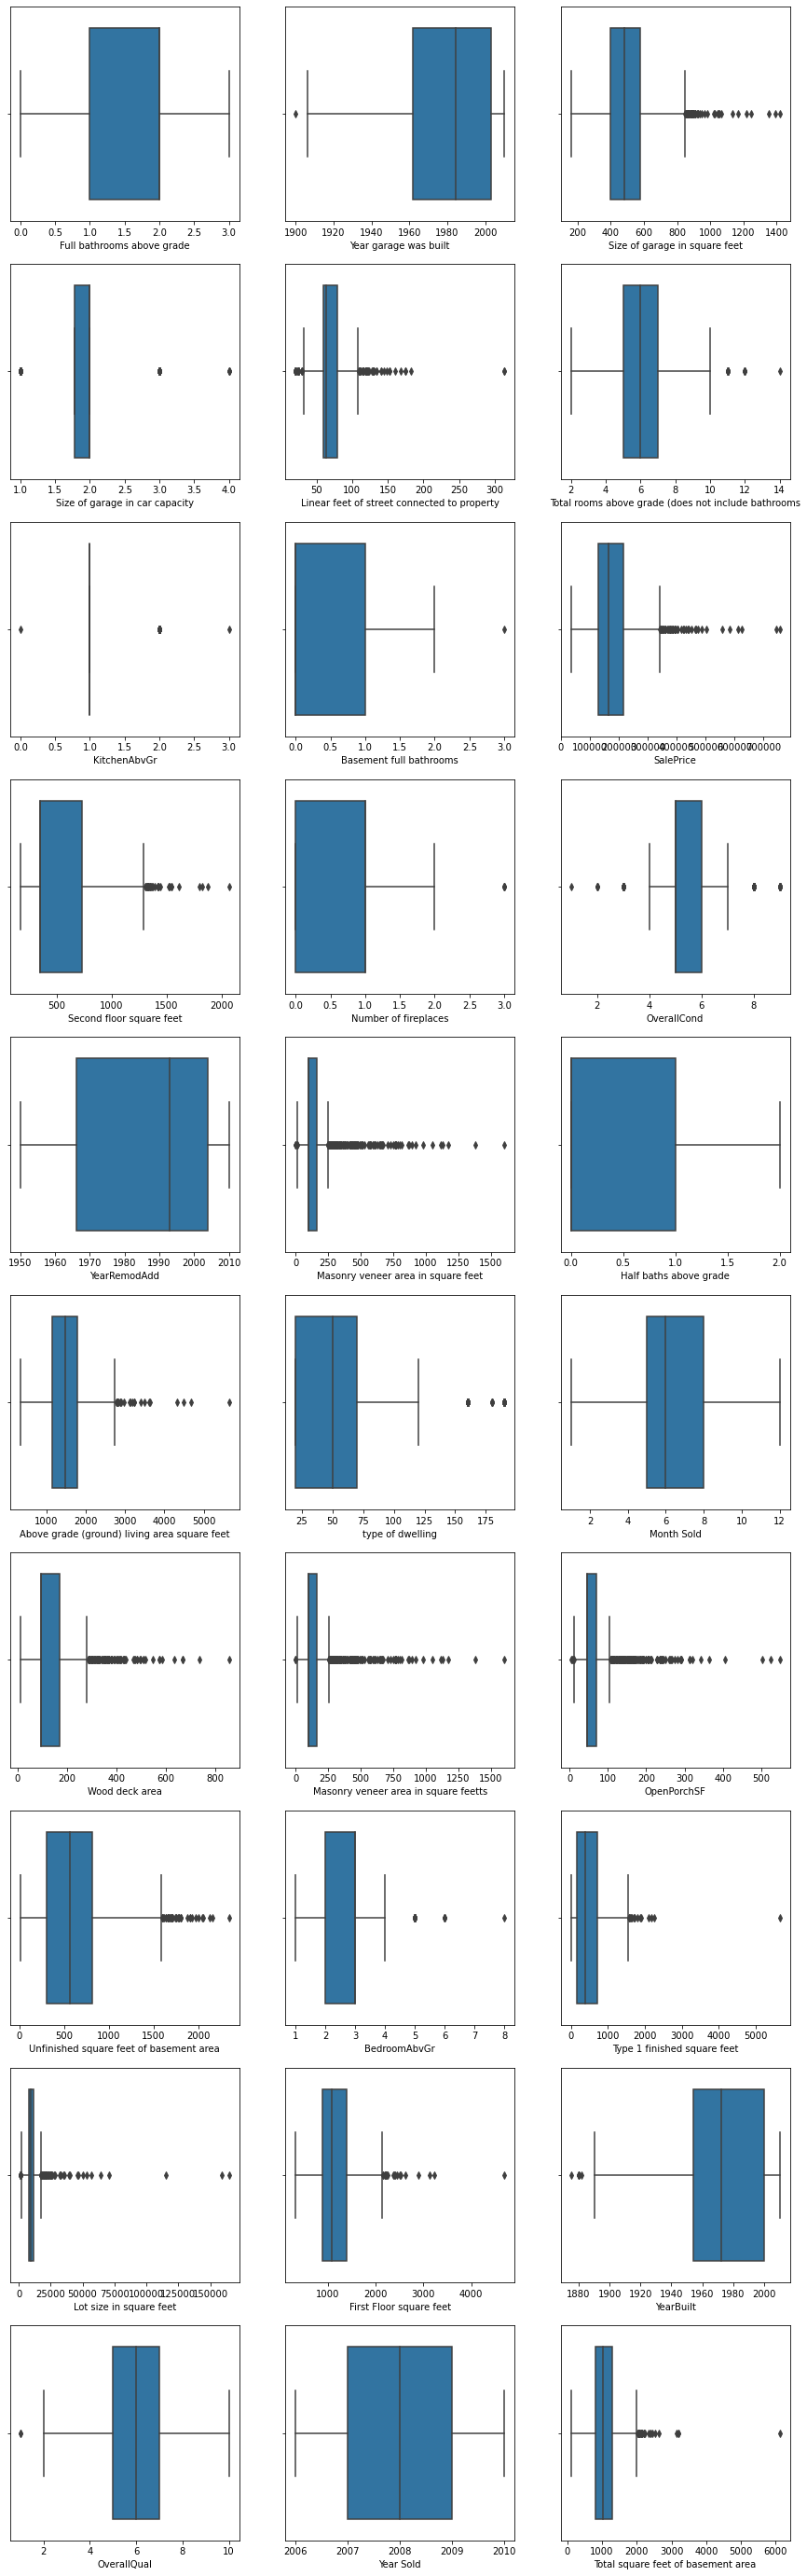

In [74]:
#finding outliers
num=df[{'type of dwelling', 'Linear feet of street connected to property',
       'Lot size in square feet', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Masonry veneer area in square feet',
       'Type 1 finished square feet',
       'Unfinished square feet of basement area',
       'Total square feet of basement area', 'First Floor square feet',
       'Second floor square feet',
       'Above grade (ground) living area square feet',
       'Basement full bathrooms', 'Full bathrooms above grade',
       'Half baths above grade', 'BedroomAbvGr', 'KitchenAbvGr',
       'Total rooms above grade (does not include bathrooms',
       'Number of fireplaces', 'Year garage was built',
       'Size of garage in car capacity', 'Size of garage in square feet',
       'Wood deck area', 'OpenPorchSF', 'Month Sold', 'Year Sold', 'SalePrice',
       'Masonry veneer area in square feetts'}]

#checking for outliers
plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

In [75]:
#removing outliers
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("rows before applying zscore: ",len(df))
print("rows after applying zscore: ",len(df_new))

rows before applying zscore:  1168
rows after applying zscore:  954


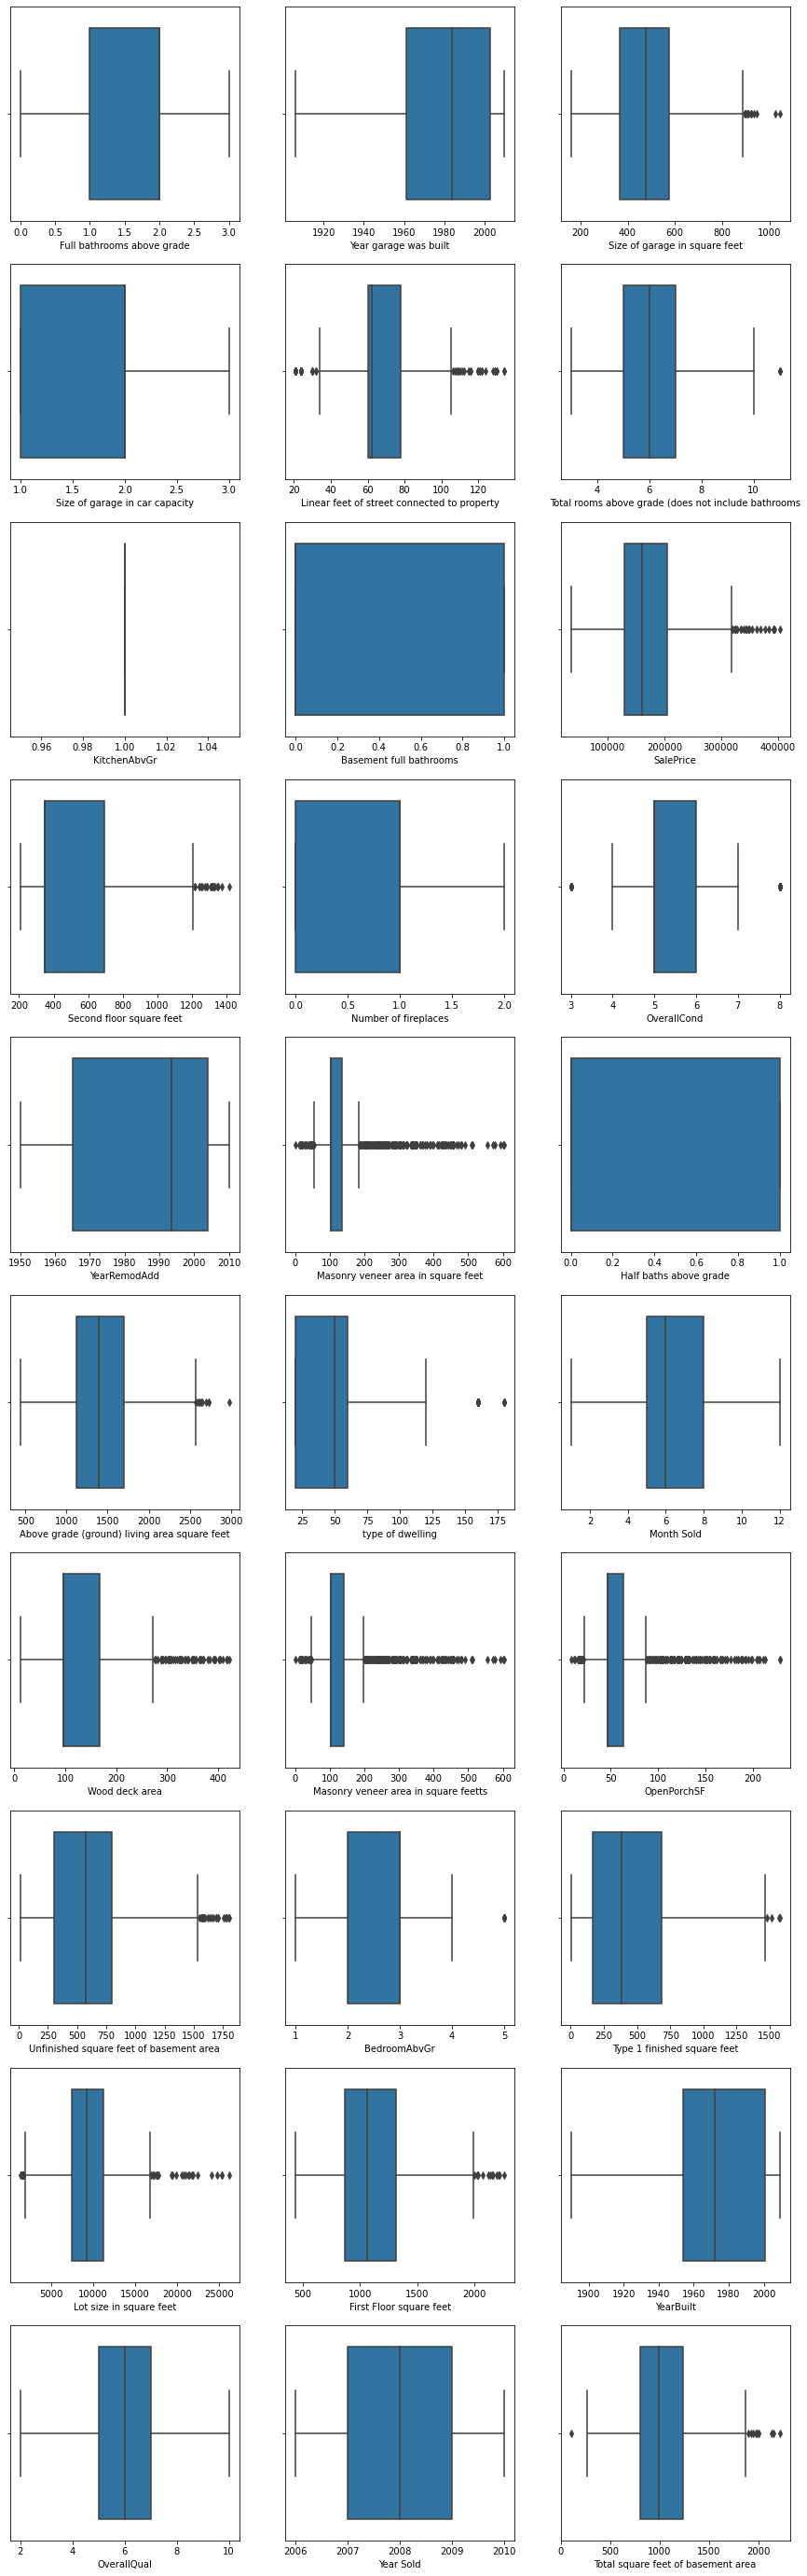

In [76]:
num=df_new[{'type of dwelling', 'Linear feet of street connected to property',
       'Lot size in square feet', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Masonry veneer area in square feet',
       'Type 1 finished square feet',
       'Unfinished square feet of basement area',
       'Total square feet of basement area', 'First Floor square feet',
       'Second floor square feet',
       'Above grade (ground) living area square feet',
       'Basement full bathrooms', 'Full bathrooms above grade',
       'Half baths above grade', 'BedroomAbvGr', 'KitchenAbvGr',
       'Total rooms above grade (does not include bathrooms',
       'Number of fireplaces', 'Year garage was built',
       'Size of garage in car capacity', 'Size of garage in square feet',
       'Wood deck area', 'OpenPorchSF', 'Month Sold', 'Year Sold', 'SalePrice',
       'Masonry veneer area in square feetts'}]


#checking for outliers
plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

Data is cleaned

In [77]:
df=df_new

In [78]:
df.skew()

type of dwelling                                        1.386555
Linear feet of street connected to property             0.378185
Lot size in square feet                                 0.674681
OverallQual                                             0.065578
OverallCond                                             0.587956
YearBuilt                                              -0.474984
YearRemodAdd                                           -0.483986
Masonry veneer area in square feet                      2.288272
Type 1 finished square feet                             0.872070
Type 2 finished square feet                             4.308144
Unfinished square feet of basement area                 0.848503
Total square feet of basement area                      0.559579
First Floor square feet                                 0.665687
Second floor square feet                                1.289964
Low quality finished square feet all floors             9.620932
Above grade (ground) livi

Skewness is low

# Graphical data analysis

In [79]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["SalePrice"].sort_values(ascending=False)

SalePrice                                              1.000000
OverallQual                                            0.798518
Above grade (ground) living area square feet           0.738217
Full bathrooms above grade                             0.646966
Size of garage in car capacity                         0.630109
YearBuilt                                              0.612338
Size of garage in square feet                          0.599493
Total square feet of basement area                     0.586724
First Floor square feet                                0.562128
Total rooms above grade (does not include bathrooms    0.556870
YearRemodAdd                                           0.544277
Year garage was built                                  0.446236
Second floor square feet                               0.425333
Number of fireplaces                                   0.422366
Type 1 finished square feet                            0.359599
Masonry veneer area in square feetts    

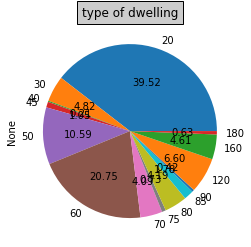

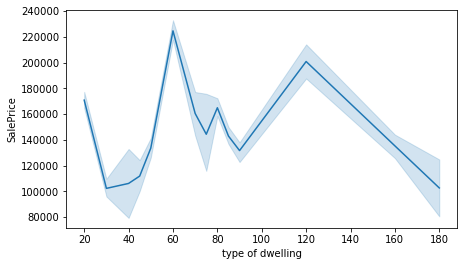

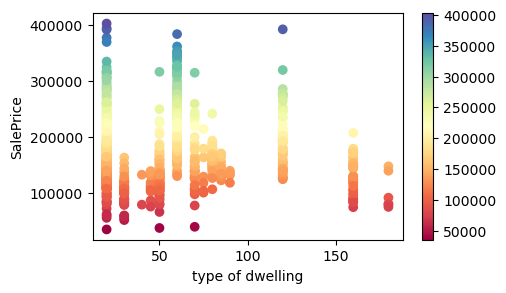

In [80]:
df.groupby('type of dwelling').size().plot(kind='pie', autopct='%.2f')
plt.title("type of dwelling",bbox={'facecolor':'0.8', 'pad':5})

plt.figure(figsize=(7,4))
sns.lineplot(x="type of dwelling",y="SalePrice",data=df)
plt.show()

x =df["type of dwelling"] 
y = df["SalePrice"]


plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('type of dwelling')
plt.ylabel('SalePrice')
plt.show()

1.The 1-STORY 1946 & NEWER ALL STYLES is highest among the types of dwellings

2.The Sale price is highest in 2-STORY 1946 & NEWER

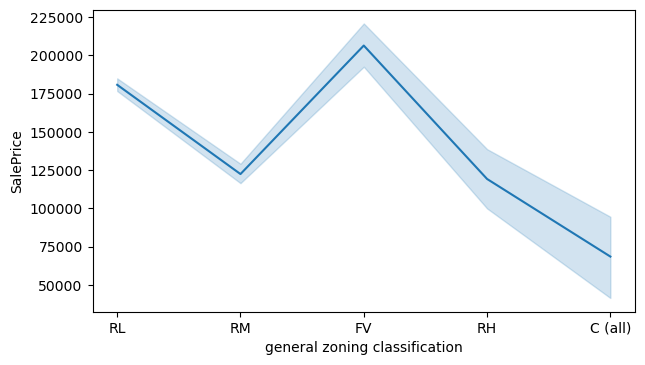

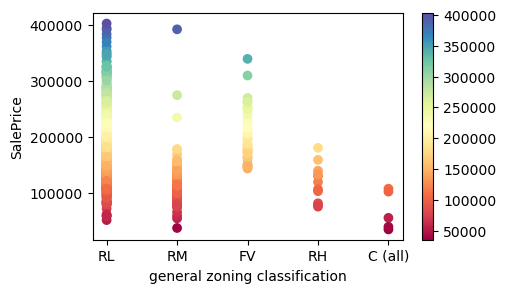

Text(0.5, 1.0, 'general zoning classification')

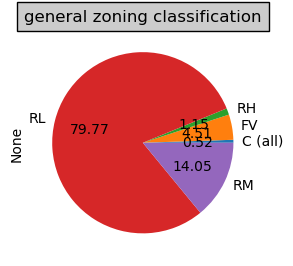

In [81]:
x =df["general zoning classification"] 
y =df["SalePrice"]


plt.figure(figsize=(7,4))
sns.lineplot(x="general zoning classification",y="SalePrice",data=df)
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('general zoning classification')
plt.ylabel('SalePrice')
plt.show()

df.groupby('general zoning classification').size().plot(kind='pie', autopct='%.2f')
plt.title("general zoning classification",bbox={'facecolor':'0.8', 'pad':5})

A Agriculture

C Commercial

FV Floating Village Residential

I Industrial

RH Residential High Density

RL Residential Low Density

RP Residential Low Density Park

RM Residential Medium Density

1.Residential Low density is highest among the general zone classification

2.Residential Low Density and Residential Medium Density gives highest sale price

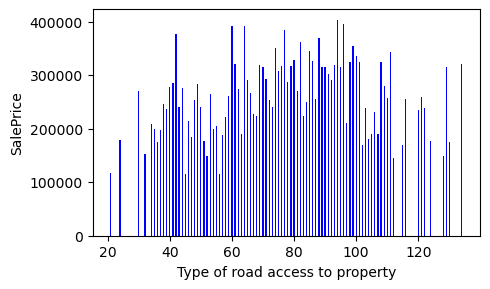

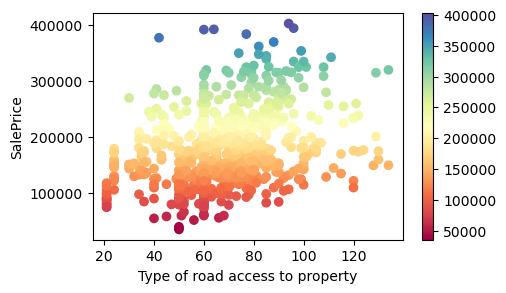

<AxesSubplot:>

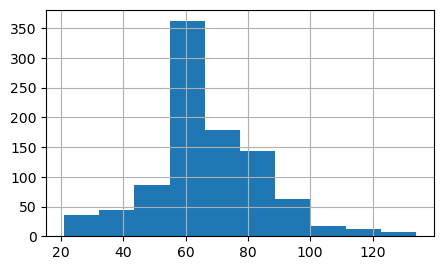

In [82]:
x =df["Linear feet of street connected to property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Type of road access to property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of road access to property')
plt.ylabel('SalePrice')
plt.show()

x.hist()

1.When the street is between 40 to 110, it gives sales price of upto 3lakh

2.But when between 60 to 90, it gives above 30lakh and upto 40lakh sales price

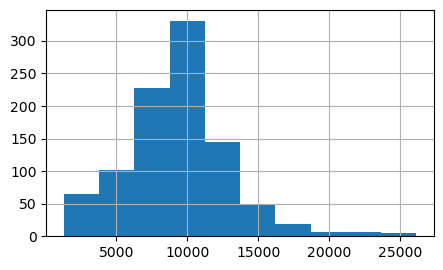

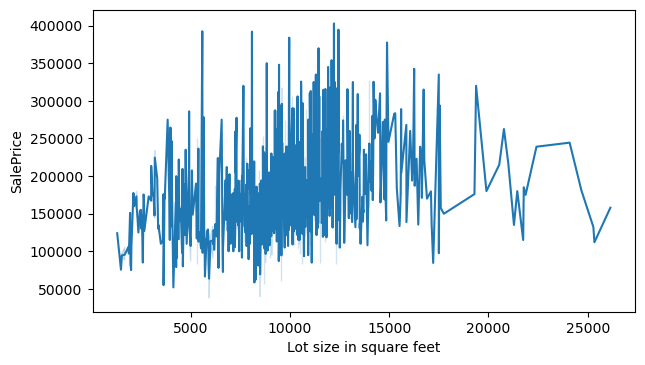

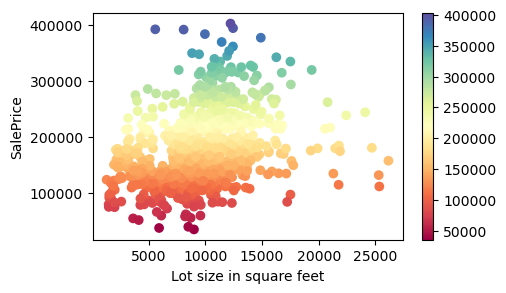

In [83]:
x =df["Lot size in square feet"] 
y =df["SalePrice"]

x.hist()

plt.figure(figsize=(7,4))
sns.lineplot(x="Lot size in square feet",y="SalePrice",data=df)
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Lot size in square feet')
plt.ylabel('SalePrice')
plt.show()

1.More than 300 customers have bought houses with land area of around 10,000 square feet

2.Sale prices are highest between 10,000sq feet and 13,000 sq feet and starts to decrease after it

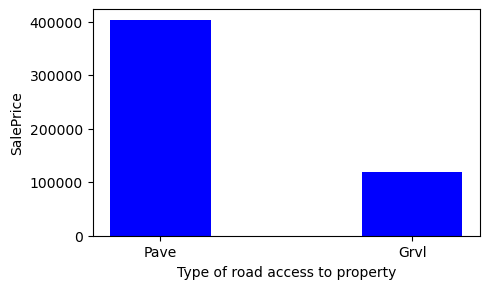

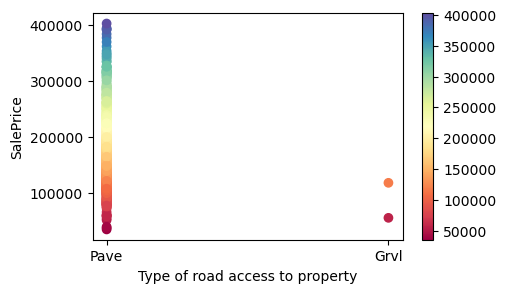

Text(0.5, 1.0, 'Type of road access to property')

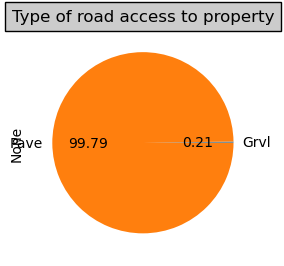

In [84]:
x =df["Type of road access to property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Type of road access to property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of road access to property')
plt.ylabel('SalePrice')
plt.show()

df.groupby('Type of road access to property').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of road access to property",bbox={'facecolor':'0.8', 'pad':5})

Paved road access is highest among the type of road acess to property and it shows highest sale price

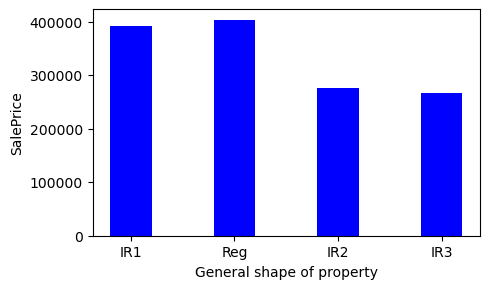

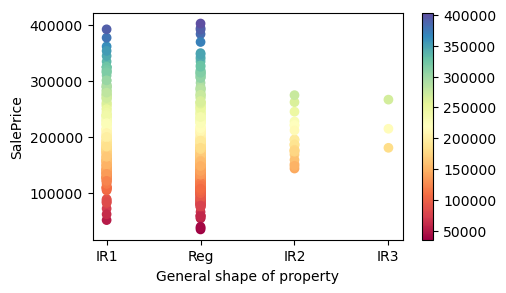

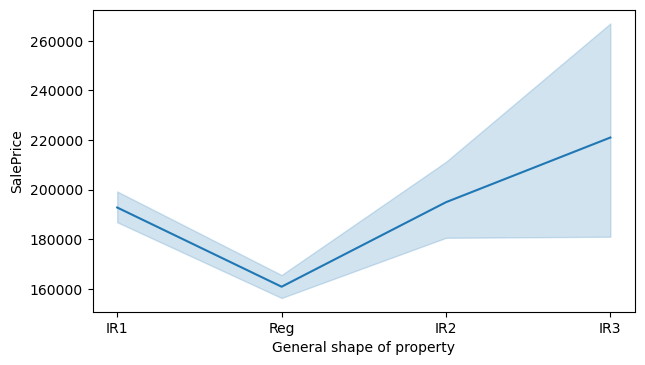

Text(0.5, 1.0, 'General shape of property')

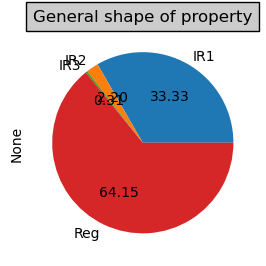

In [85]:
x =df["General shape of property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("General shape of property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('General shape of property')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="General shape of property",y="SalePrice",data=df)
plt.show()


df.groupby('General shape of property').size().plot(kind='pie', autopct='%.2f')
plt.title("General shape of property",bbox={'facecolor':'0.8', 'pad':5})

1.Maximum houses have regular shape

2.But the houses with slightly irregular shape shows the highest sales price

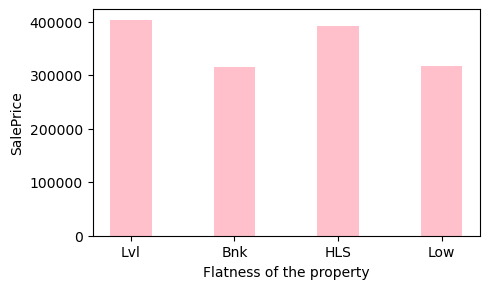

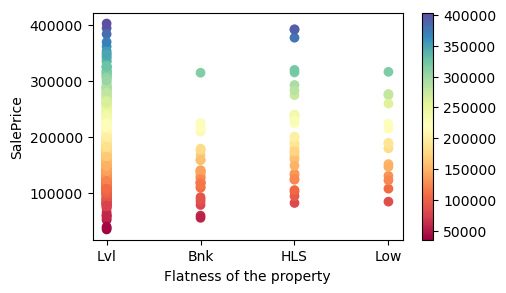

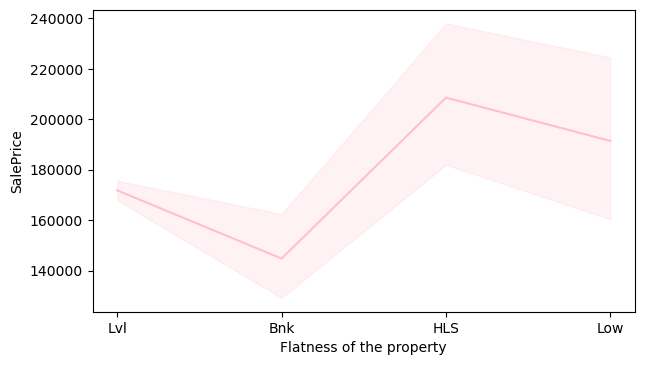

Text(0.5, 1.0, 'Flatness of the property')

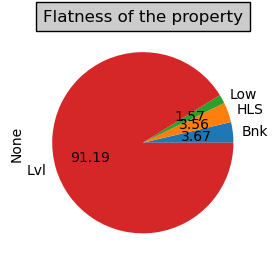

In [86]:
#Flatness of the property

x =df["Flatness of the property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='pink',width = 0.4)
plt.xlabel("Flatness of the property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Flatness of the property')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Flatness of the property",y="SalePrice",data=df,color ='pink')
plt.show()

df.groupby('Flatness of the property').size().plot(kind='pie', autopct='%.2f')
plt.title("Flatness of the property",bbox={'facecolor':'0.8', 'pad':5})

Lvl -Near Flat/Level

Bnk Banked - Quick and significant rise from street grade to building

HLS Hillside - Significant slope from side to side

Low Depression

1.Most of the property was levelled

2.Property which were hillside with significant slope from side to side had highest sale price

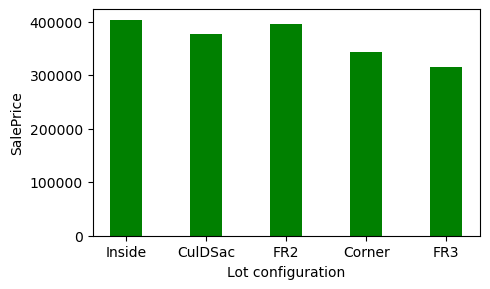

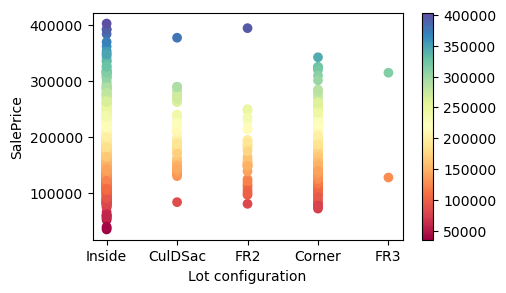

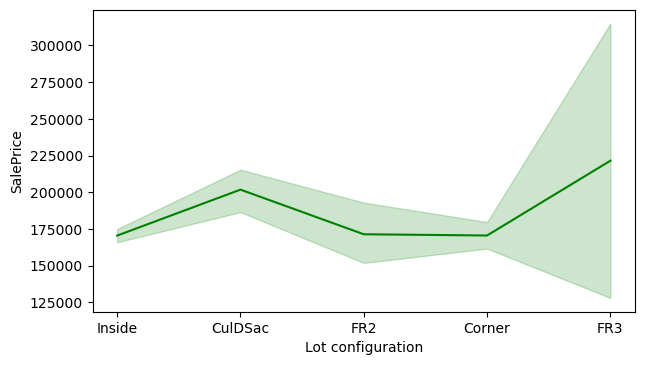

Text(0.5, 1.0, 'Lot configuration')

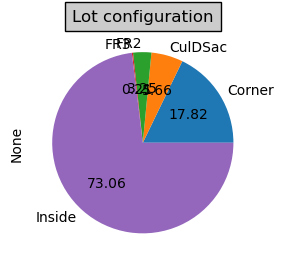

In [87]:
x =df["Lot configuration"] 
y =df["SalePrice"]

plt.bar(x, y, color ='green',width = 0.4)
plt.xlabel("Lot configuration")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Lot configuration')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Lot configuration",y="SalePrice",data=df,color ='green')
plt.show()

df.groupby('Lot configuration').size().plot(kind='pie', autopct='%.2f')
plt.title("Lot configuration",bbox={'facecolor':'0.8', 'pad':5})

Inside-Inside lot

Corner-Corner lot

CulDSac-Cul-de-sac

FR2 Frontage on 2 sides of property

FR3 Frontage on 3 sides of property

1.Highest is Inside lot

2.Sale price is highest for Cul de sac

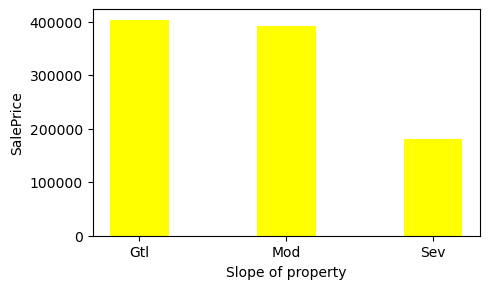

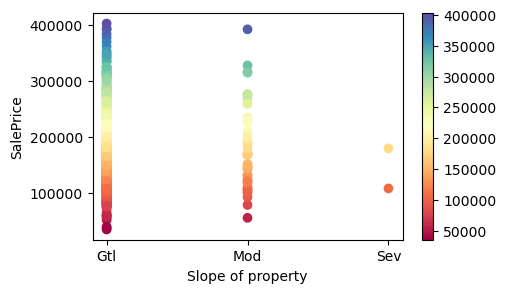

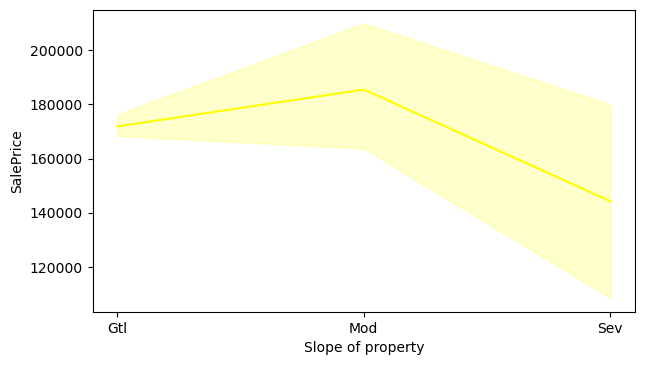

Text(0.5, 1.0, 'Slope of property')

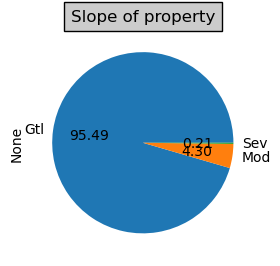

In [88]:
x =df["Slope of property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='yellow',width = 0.4)
plt.xlabel("Slope of property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Slope of property')
plt.ylabel('SalePrice')
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="Slope of property",y="SalePrice",data=df,color ='yellow')
plt.show()


df.groupby('Slope of property').size().plot(kind='pie', autopct='%.2f')
plt.title("Slope of property",bbox={'facecolor':'0.8', 'pad':5})

Gtl Gentle slope

Mod Moderate Slope

Sev Severe Slope

The highets number of properties have gentler slope and show higher sales price

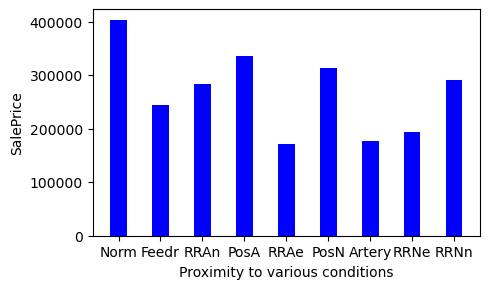

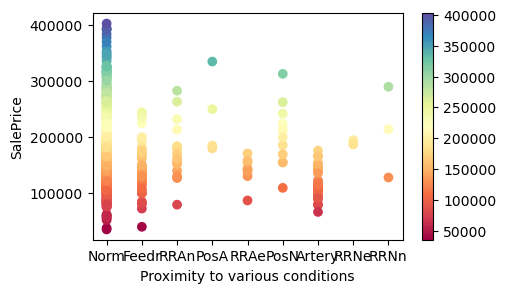

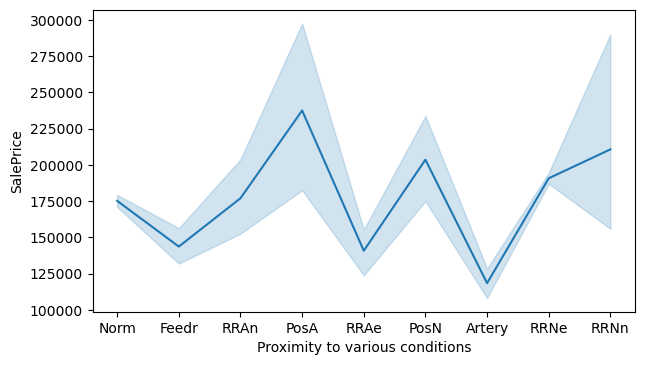

Text(0.5, 1.0, 'Proximity to various conditions')

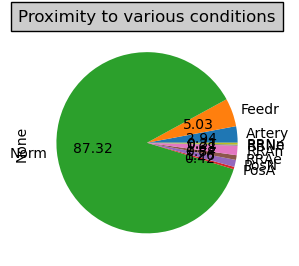

In [89]:
x =df["Proximity to various conditions"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Proximity to various conditions")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Proximity to various conditions')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Proximity to various conditions",y="SalePrice",data=df)
plt.show()

df.groupby('Proximity to various conditions').size().plot(kind='pie', autopct='%.2f')
plt.title("Proximity to various conditions",bbox={'facecolor':'0.8', 'pad':5})

Maximum number of houses are normal and they show highest sale price

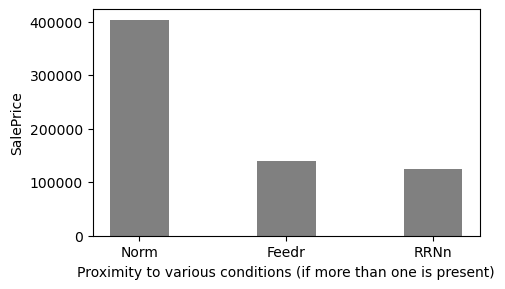

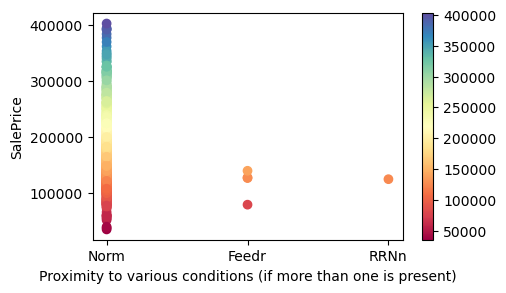

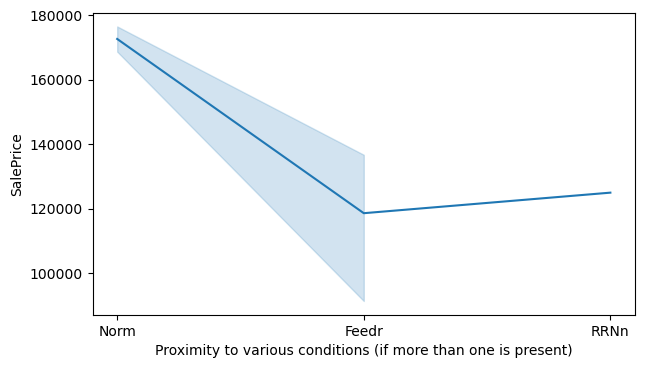

Text(0.5, 1.0, 'Proximity to various conditions (if more than one is present)')

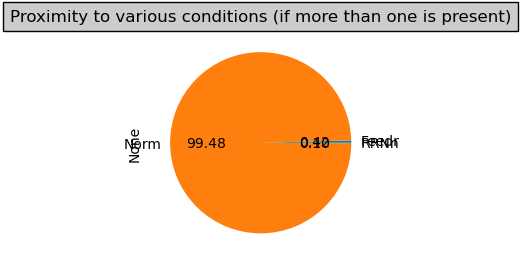

In [90]:
x =df["Proximity to various conditions (if more than one is present)"] 
y =df["SalePrice"]

plt.bar(x, y, color ='grey',width = 0.4)
plt.xlabel("Proximity to various conditions (if more than one is present)")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Proximity to various conditions (if more than one is present)')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Proximity to various conditions (if more than one is present)",y="SalePrice",data=df)
plt.show()

df.groupby('Proximity to various conditions (if more than one is present)').size().plot(kind='pie', autopct='%.2f')
plt.title("Proximity to various conditions (if more than one is present)",bbox={'facecolor':'0.8', 'pad':5})

Maximum number of houses are normal and they show highest sale price

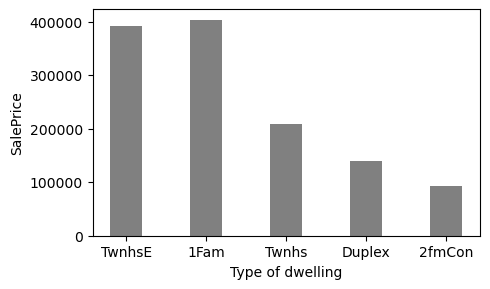

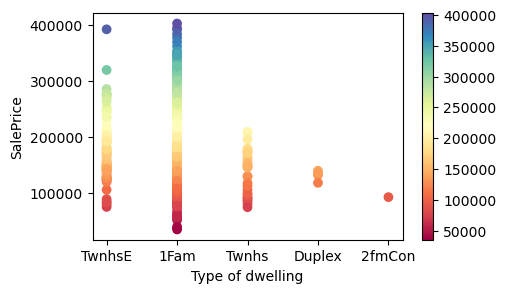

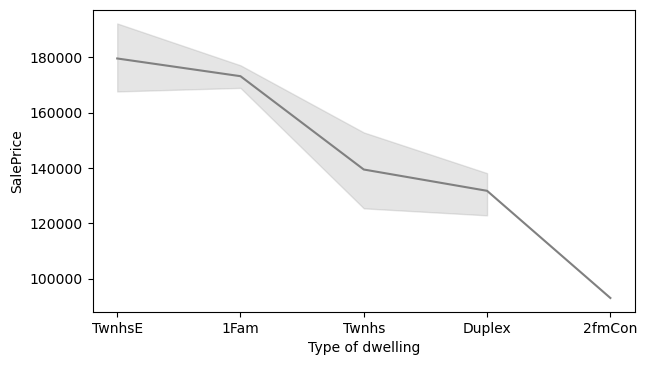

Text(0.5, 1.0, 'Type of dwelling')

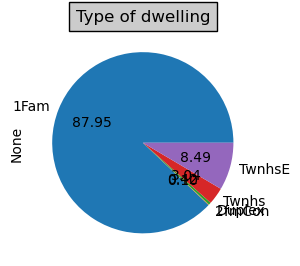

In [91]:
x =df["Type of dwelling"] 
y =df["SalePrice"]

plt.bar(x, y, color ='grey',width = 0.4)
plt.xlabel("Type of dwelling")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of dwelling')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Type of dwelling",y="SalePrice",data=df,color ='grey')
plt.show()


df.groupby('Type of dwelling').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of dwelling",bbox={'facecolor':'0.8', 'pad':5})

1.Maximum houses are single family detached

2.Maximum sale price is for Townhouse End Unit

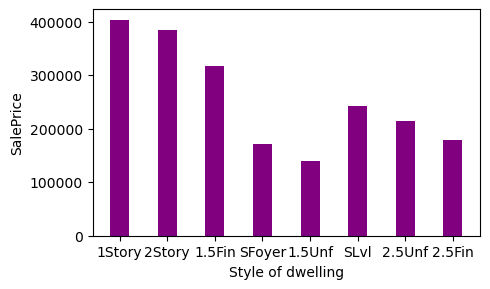

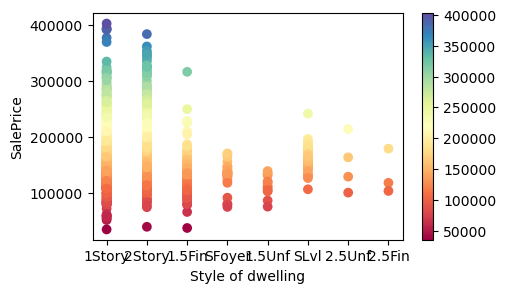

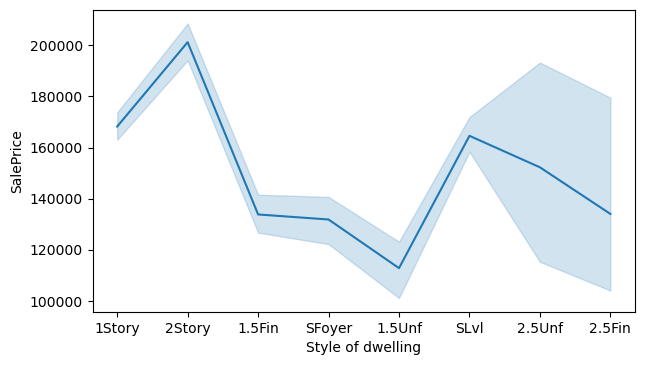

Text(0.5, 1.0, 'Style of dwelling')

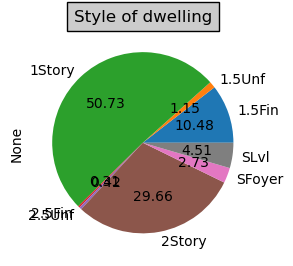

In [92]:
x =df["Style of dwelling"] 
y =df["SalePrice"]

plt.bar(x, y, color ='purple',width = 0.4)
plt.xlabel("Style of dwelling")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Style of dwelling')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Style of dwelling",y="SalePrice",data=df)
plt.show()

df.groupby('Style of dwelling').size().plot(kind='pie', autopct='%.2f')
plt.title("Style of dwelling",bbox={'facecolor':'0.8', 'pad':5})

Maximum houses are 1 story but sale price of 2 storey is highest

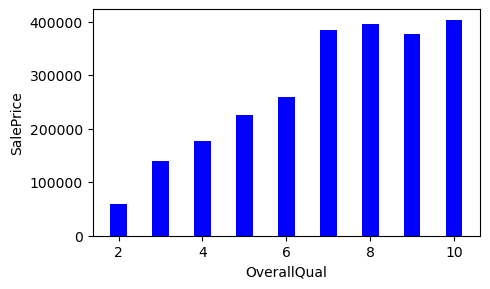

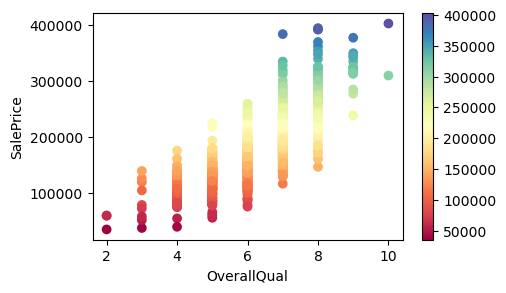

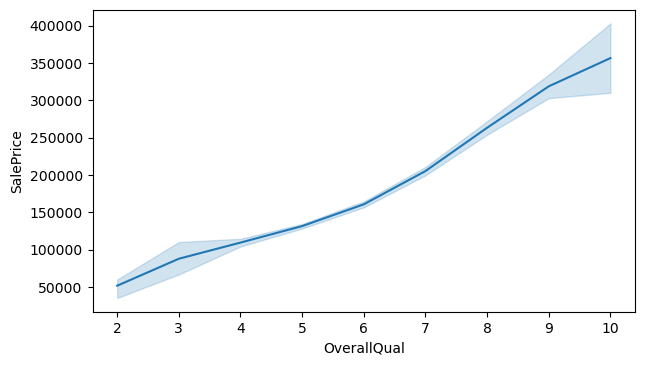

Text(0.5, 1.0, 'OverallQual')

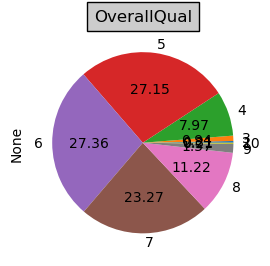

In [93]:
x =df["OverallQual"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="OverallQual",y="SalePrice",data=df)
plt.show()


df.groupby('OverallQual').size().plot(kind='pie', autopct='%.2f')
plt.title("OverallQual",bbox={'facecolor':'0.8', 'pad':5})


Maximum houses are above average

With increase in quality the price of the house increases

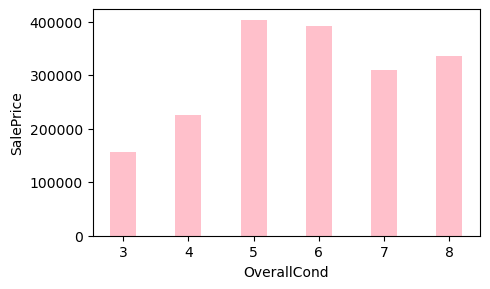

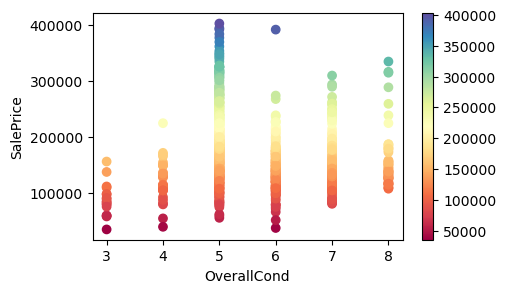

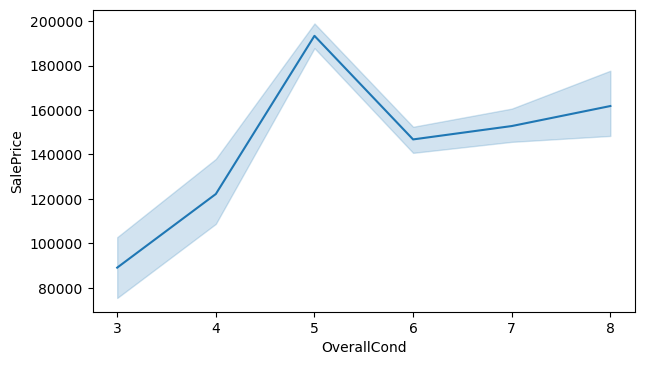

Text(0.5, 1.0, 'OverallCond')

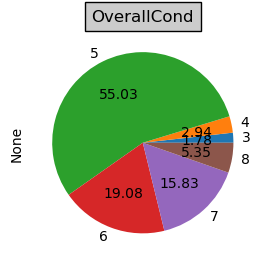

In [94]:
x =df["OverallCond"] 
y =df["SalePrice"]

plt.bar(x, y, color ='pink',width = 0.4)
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="OverallCond",y="SalePrice",data=df)
plt.show()


df.groupby('OverallCond').size().plot(kind='pie', autopct='%.2f')
plt.title("OverallCond",bbox={'facecolor':'0.8', 'pad':5})

Most of the houses are average conditions.

The prices increase upto average, then the price starts dropping towards very excellent

<AxesSubplot:>

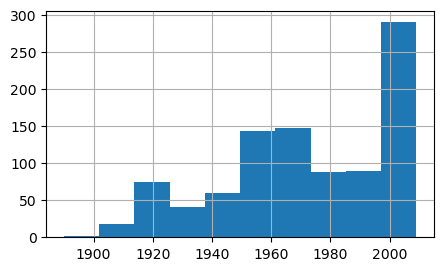

In [95]:
df["YearBuilt"].hist()

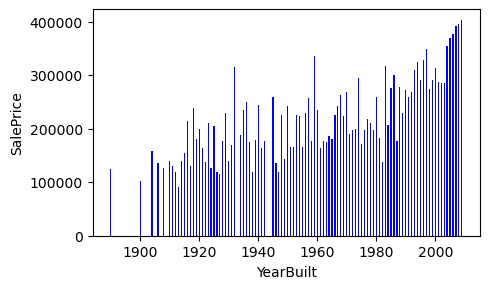

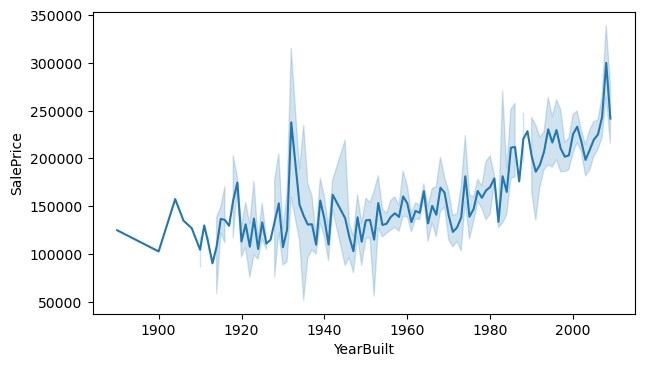

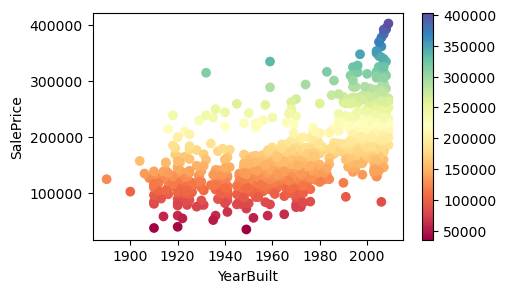

In [96]:
x =df["YearBuilt"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="YearBuilt",y="SalePrice",data=df)
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

Sale price increases when the house is more New

<AxesSubplot:>

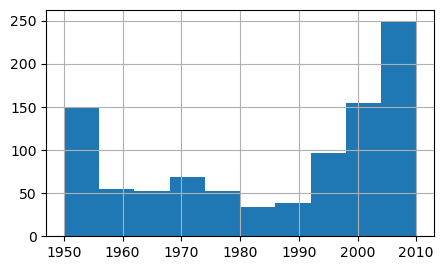

In [97]:
df["YearRemodAdd"].hist()

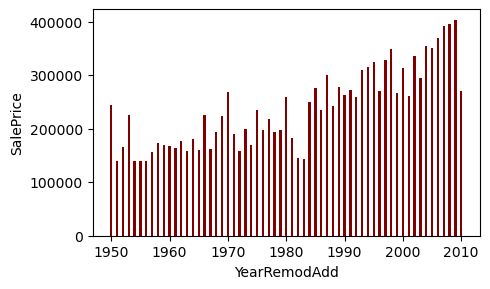

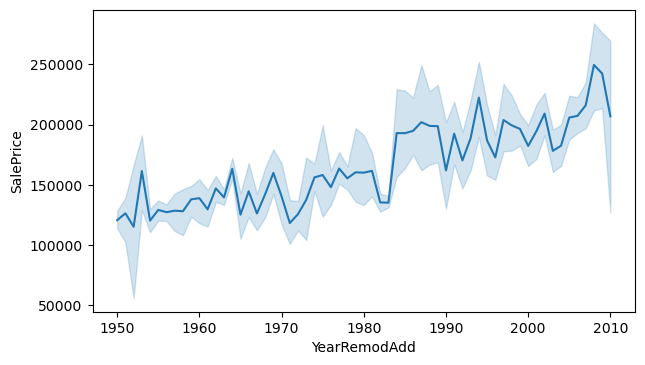

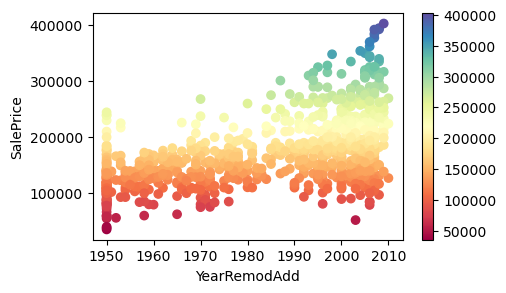

Text(0.5, 1.0, 'YearRemodAdd')

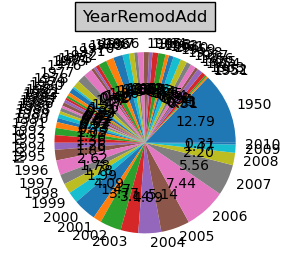

In [98]:
x =df["YearRemodAdd"] 
y =df["SalePrice"]

plt.bar(x, y, color ='maroon',width = 0.4)
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="YearRemodAdd",y="SalePrice",data=df)
plt.show()


plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.show()

df.groupby('YearRemodAdd').size().plot(kind='pie', autopct='%.2f')
plt.title("YearRemodAdd",bbox={'facecolor':'0.8', 'pad':5})

The sooner the remodelling was done, the higher the prices

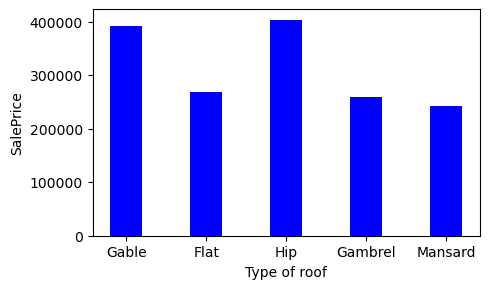

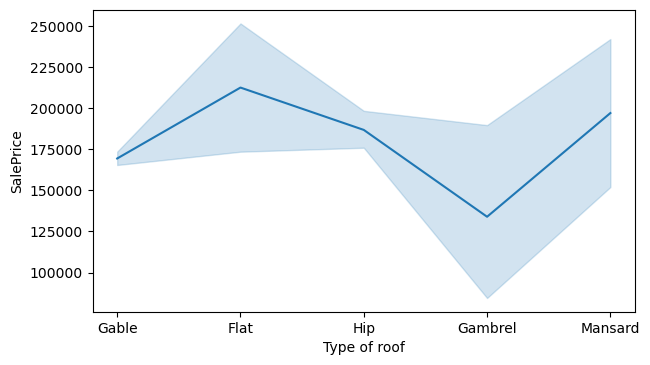

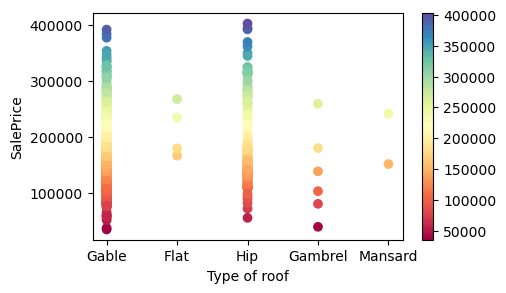

Text(0.5, 1.0, 'Type of roof')

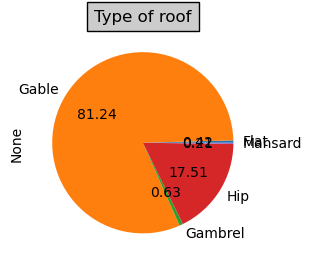

In [99]:
x =df["Type of roof"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Type of roof")
plt.ylabel("SalePrice")
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="Type of roof",y="SalePrice",data=df)
plt.show()


plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of roof')
plt.ylabel('SalePrice')
plt.show()

df.groupby('Type of roof').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of roof",bbox={'facecolor':'0.8', 'pad':5})

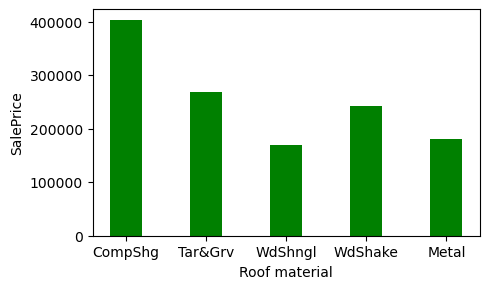

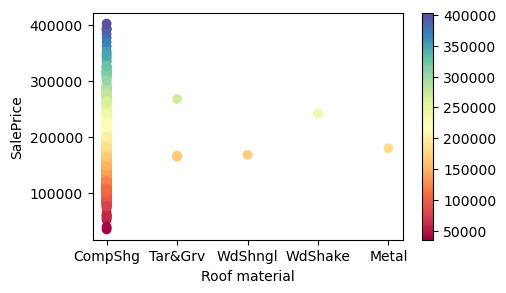

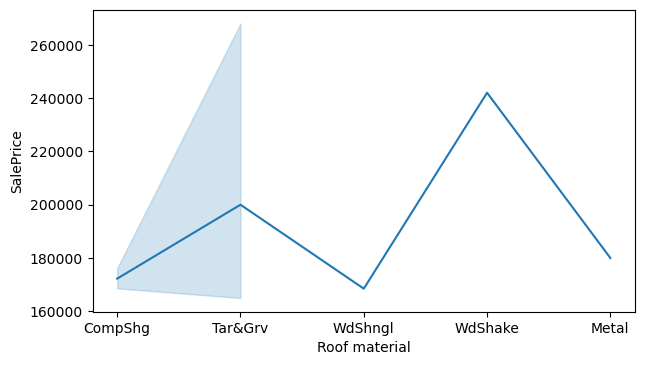

Text(0.5, 1.0, 'Roof material')

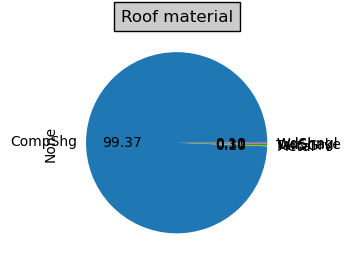

In [100]:
x =df["Roof material"] 
y =df["SalePrice"]

plt.bar(x, y, color ='green',width = 0.4)
plt.xlabel("Roof material")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Roof material')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Roof material",y="SalePrice",data=df)
plt.show()

df.groupby('Roof material').size().plot(kind='pie', autopct='%.2f')
plt.title("Roof material",bbox={'facecolor':'0.8', 'pad':5})

Maximum roofs are made of Standard Composite Shinglea

Both standard composite shingle and Wood shakes show high price

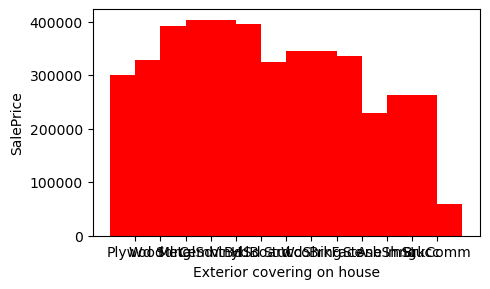

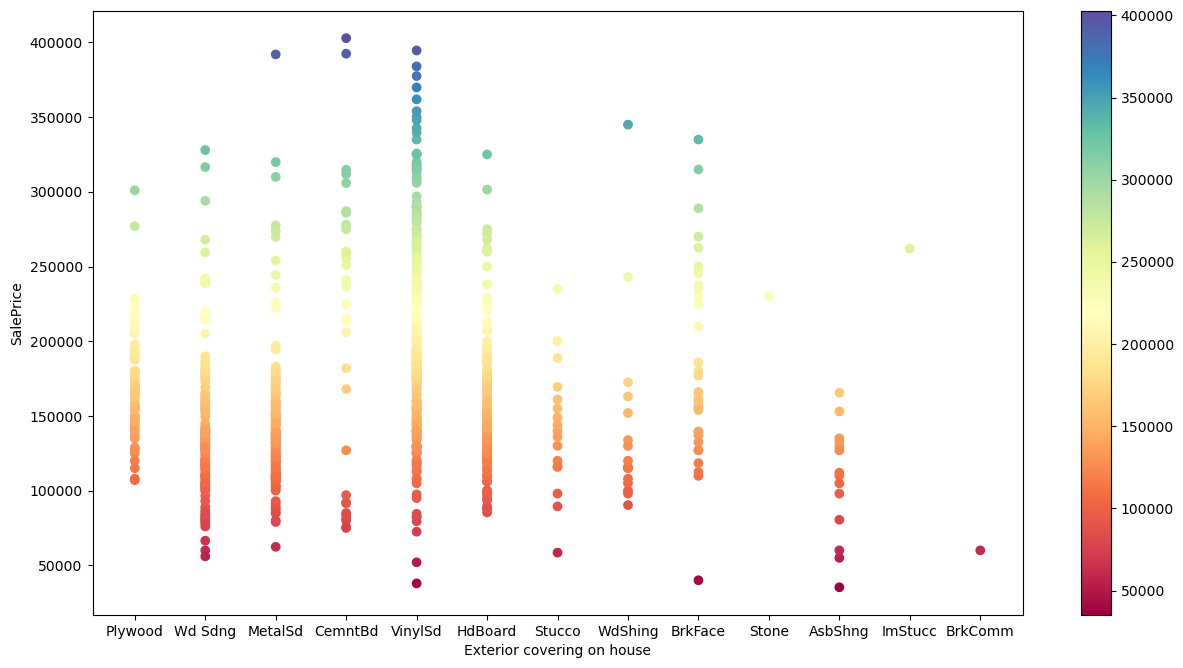

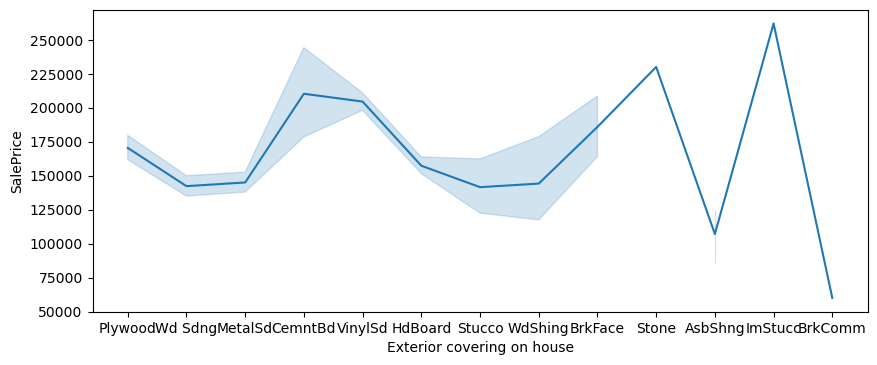

Text(0.5, 1.0, 'Exterior covering on house')

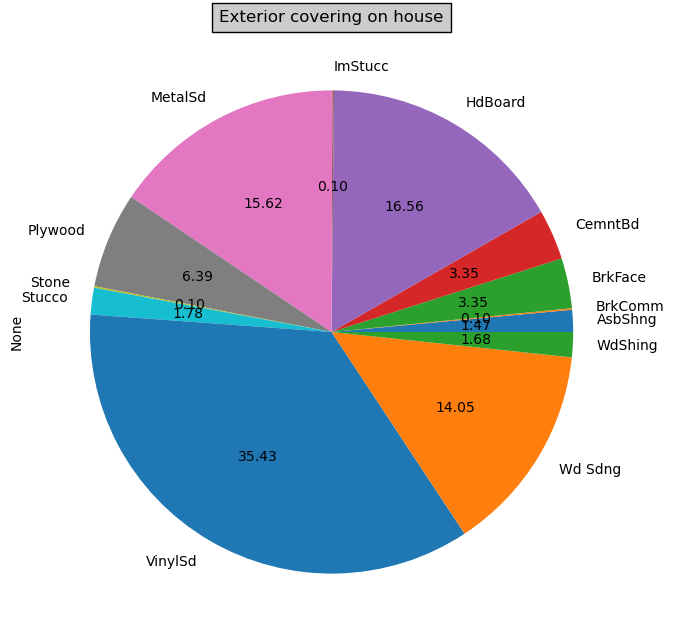

In [101]:
x =df["Exterior covering on house"] 
y =df["SalePrice"]

plt.bar(x, y, color ='red',width = 2)
plt.xlabel("Exterior covering on house")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Exterior covering on house')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Exterior covering on house",y="SalePrice",data=df)
plt.show()

df.groupby('Exterior covering on house').size().plot(kind='pie', autopct='%.2f')
plt.title("Exterior covering on house",bbox={'facecolor':'0.8', 'pad':5})

Vinyl siding has highest sales price

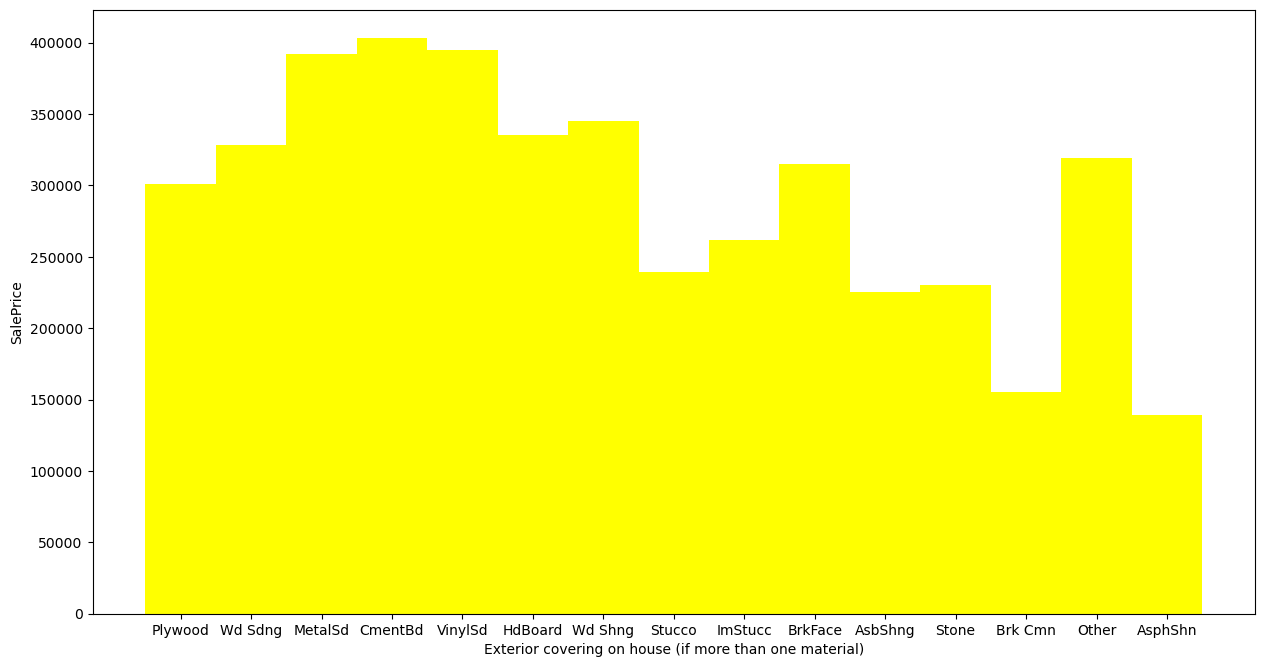

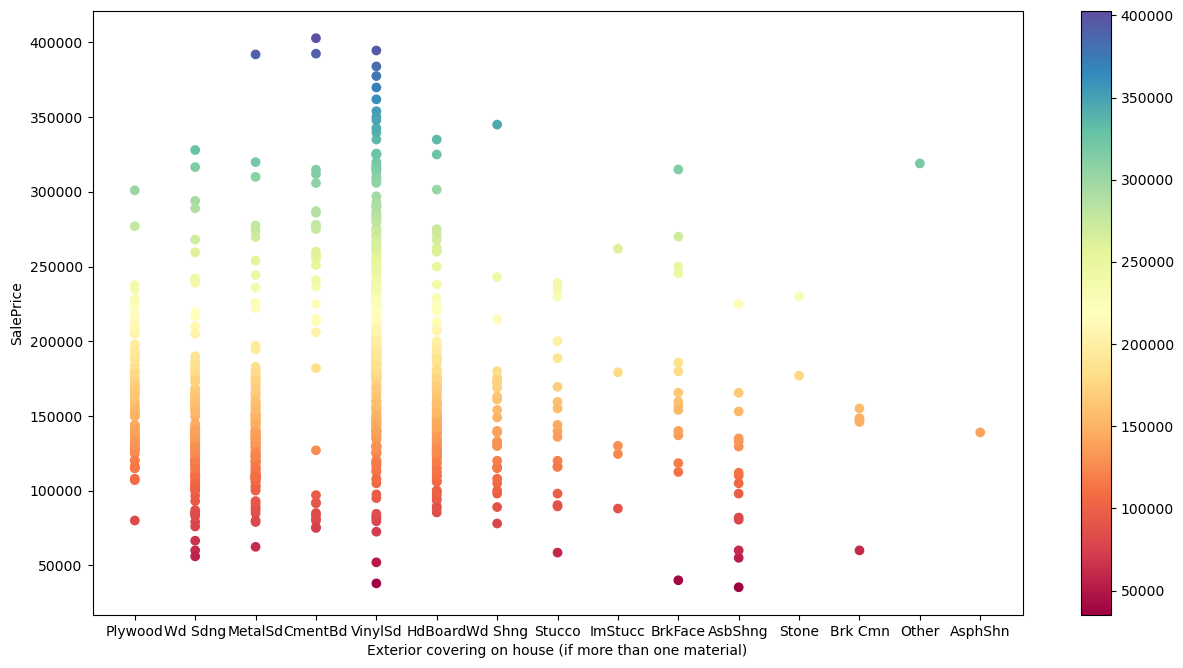

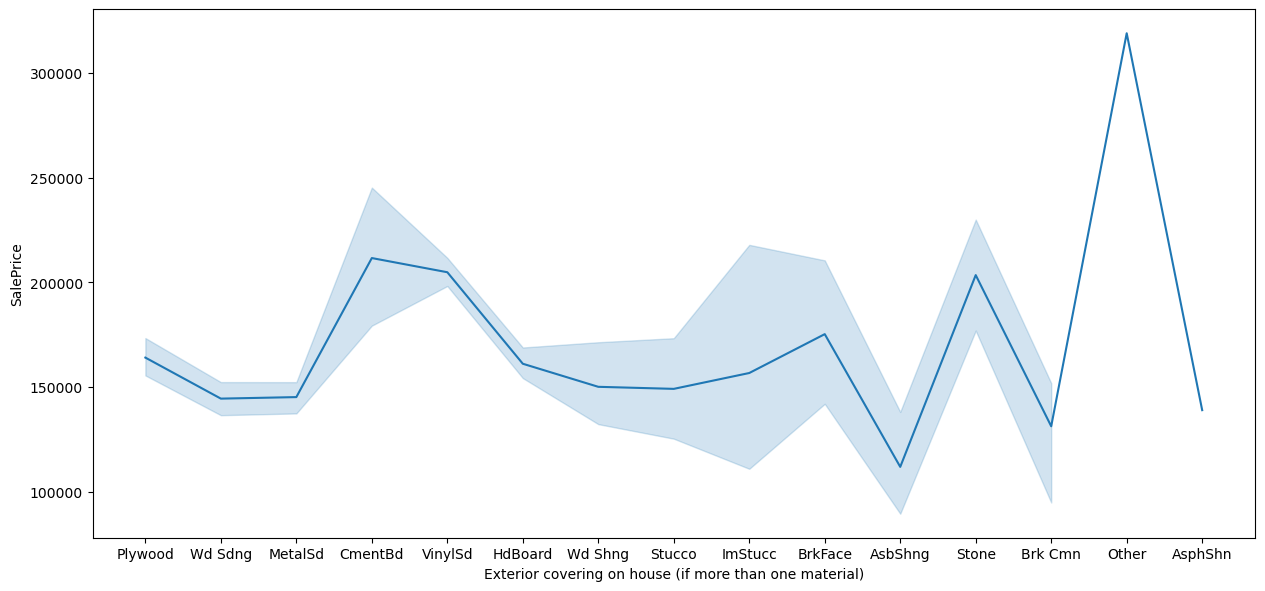

Text(0.5, 1.0, 'Exterior covering on house (if more than one material)')

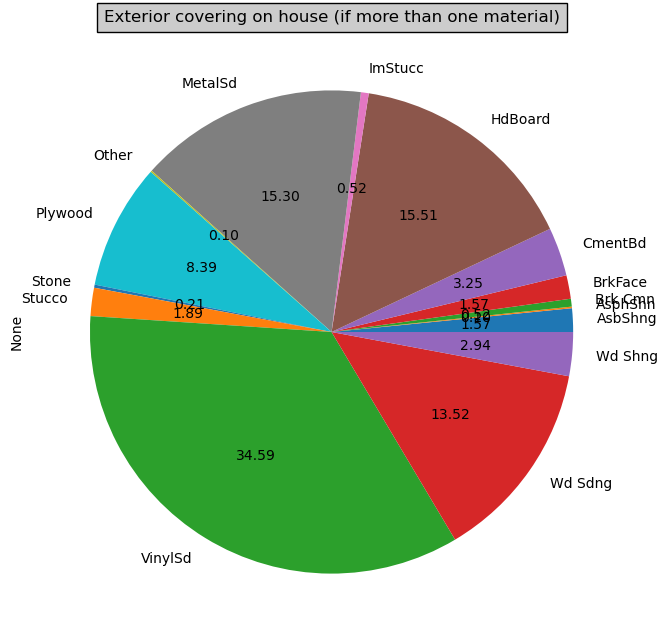

In [102]:
x =df["Exterior covering on house (if more than one material)"] 
y =df["SalePrice"]

plt.bar(x, y, color ='yellow',width = 1)
plt.xlabel("Exterior covering on house (if more than one material)")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Exterior covering on house (if more than one material)')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(15,7))
sns.lineplot(x="Exterior covering on house (if more than one material)",y="SalePrice",data=df)
plt.show()

df.groupby('Exterior covering on house (if more than one material)').size().plot(kind='pie', autopct='%.2f')
plt.title("Exterior covering on house (if more than one material)",bbox={'facecolor':'0.8', 'pad':5})

Largest number of houses have Vinyl but the highest price is for Cement board

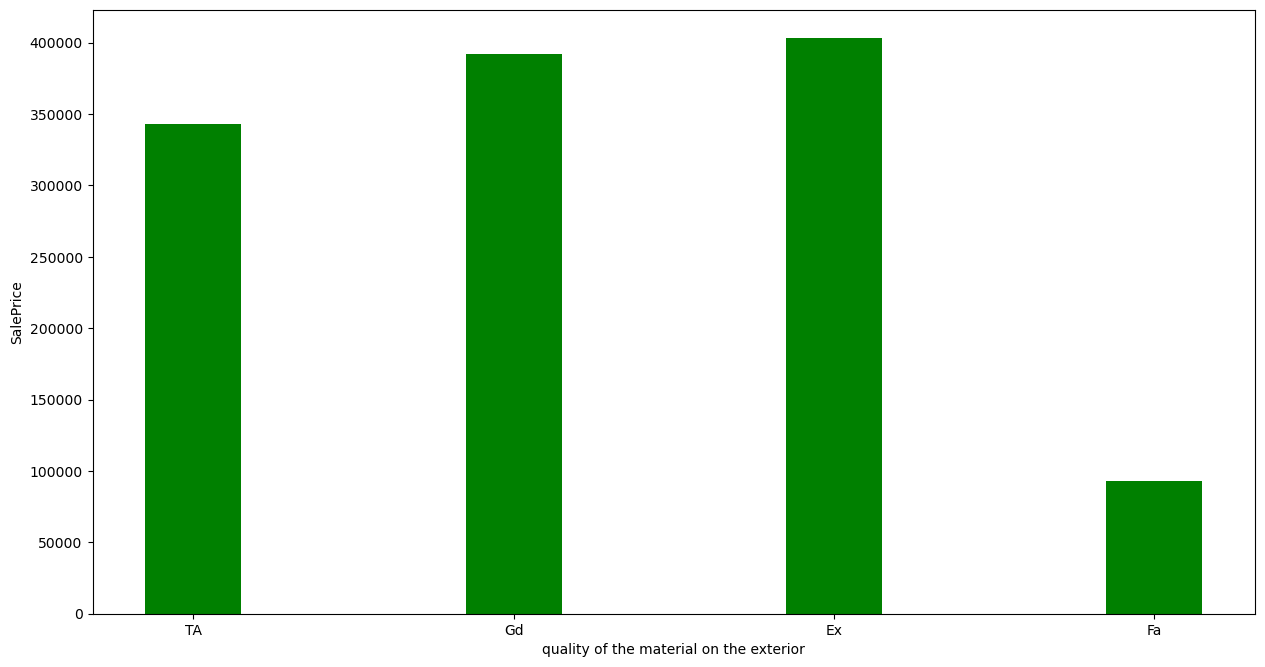

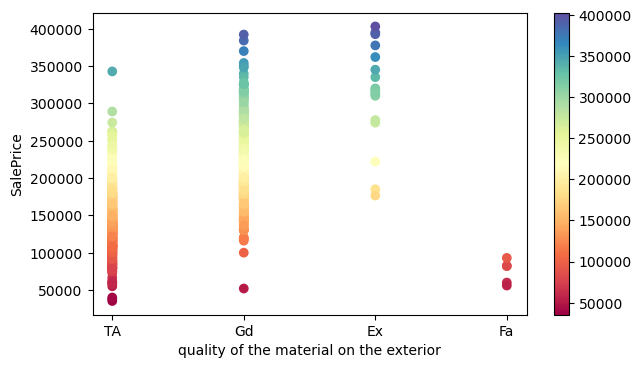

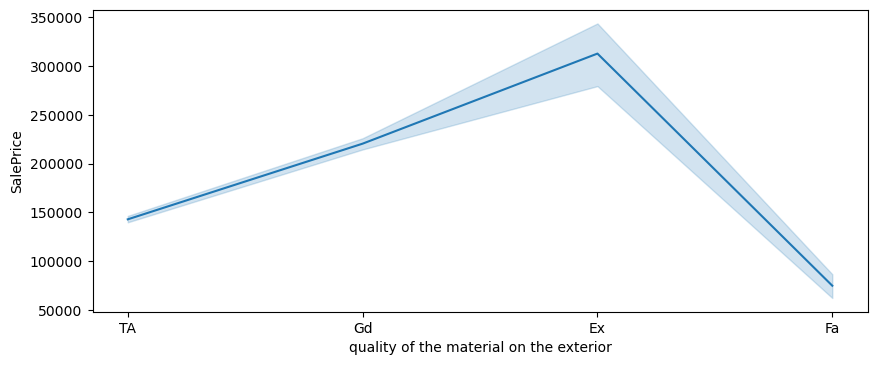

Text(0.5, 1.0, 'quality of the material on the exterior')

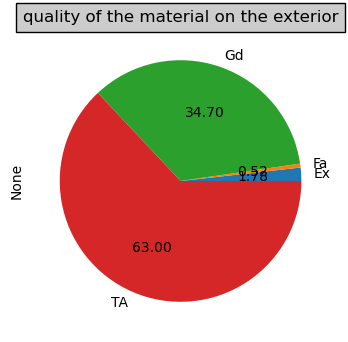

In [103]:
x =df["quality of the material on the exterior"] 
y =df["SalePrice"]

plt.bar(x, y, color ='green',width = 0.3)
plt.xlabel("quality of the material on the exterior")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('quality of the material on the exterior')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="quality of the material on the exterior",y="SalePrice",data=df)
plt.show()

df.groupby('quality of the material on the exterior').size().plot(kind='pie', autopct='%.2f')
plt.title("quality of the material on the exterior",bbox={'facecolor':'0.8', 'pad':5})

Maximum number of houses are average, but maximum sale price is for Excellent houses

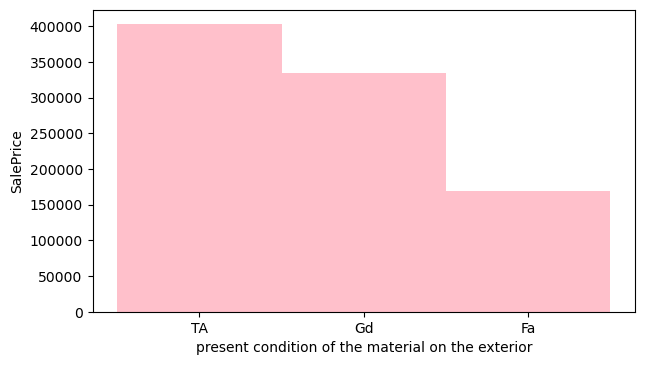

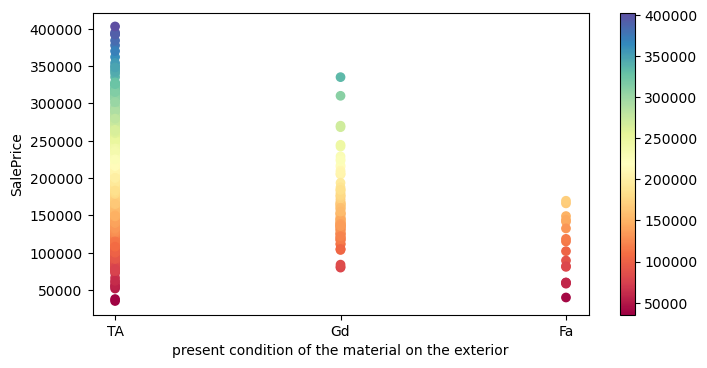

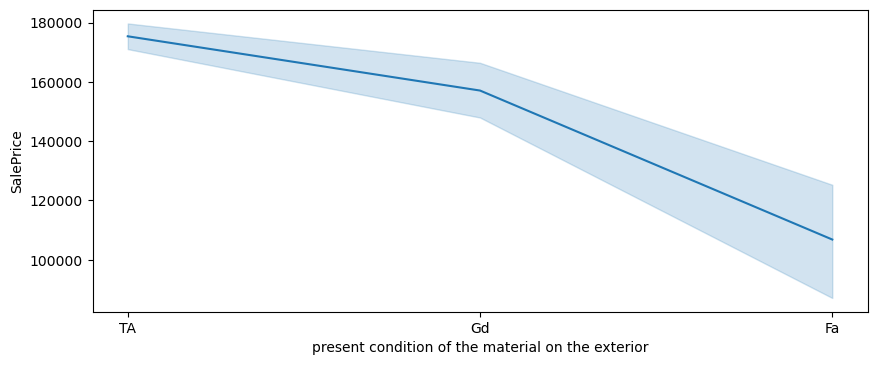

Text(0.5, 1.0, 'present condition of the material on the exterior')

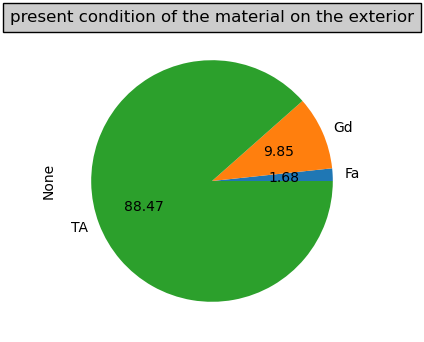

In [104]:
x =df["present condition of the material on the exterior"] 
y =df["SalePrice"]

plt.bar(x, y, color ='pink',width = 1)
plt.xlabel("present condition of the material on the exterior")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('present condition of the material on the exterior')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="present condition of the material on the exterior",y="SalePrice",data=df)
plt.show()

df.groupby('present condition of the material on the exterior').size().plot(kind='pie', autopct='%.2f')
plt.title("present condition of the material on the exterior",bbox={'facecolor':'0.8', 'pad':5})

Maximum houses are having average rating for the condition of the exterior materials, but maximum price is obtained for good ratings of the exterior materials condition

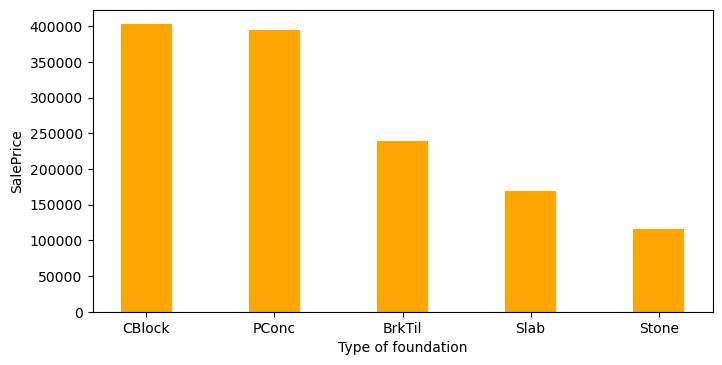

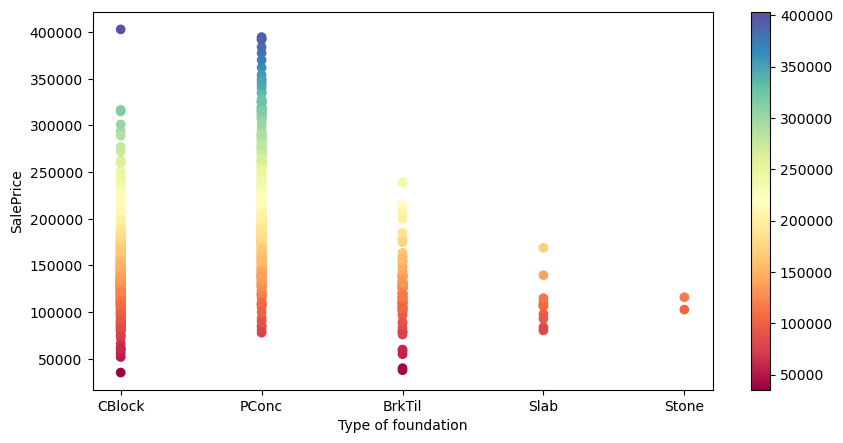

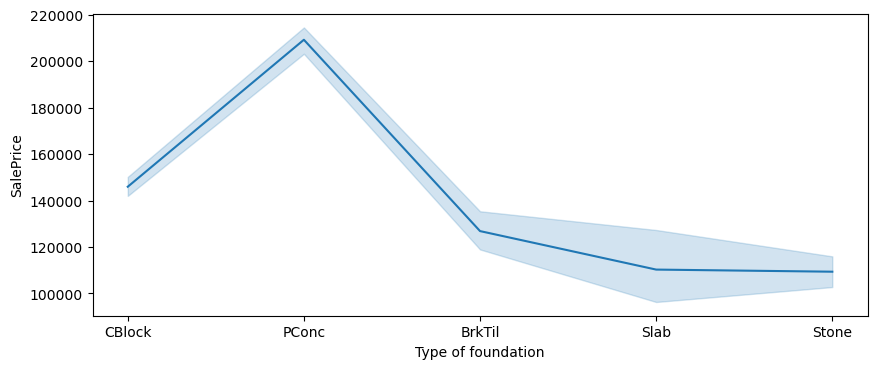

Text(0.5, 1.0, 'Type of foundation')

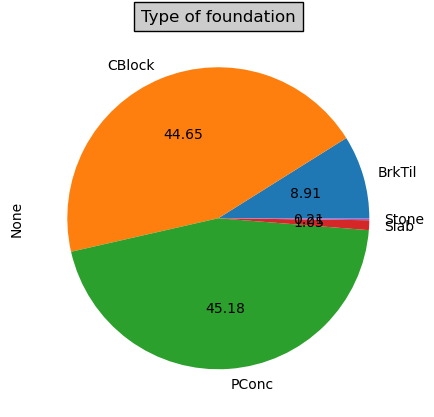

In [105]:
x =df["Type of foundation"] 
y =df["SalePrice"]

plt.bar(x, y, color ='orange',width = 0.4)
plt.xlabel("Type of foundation")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of foundation')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Type of foundation",y="SalePrice",data=df)
plt.show()

df.groupby('Type of foundation').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of foundation",bbox={'facecolor':'0.8', 'pad':5})

1.Maximum foundations are of cinder block and poured concrete

2.Maximum sale price is for poured concrete

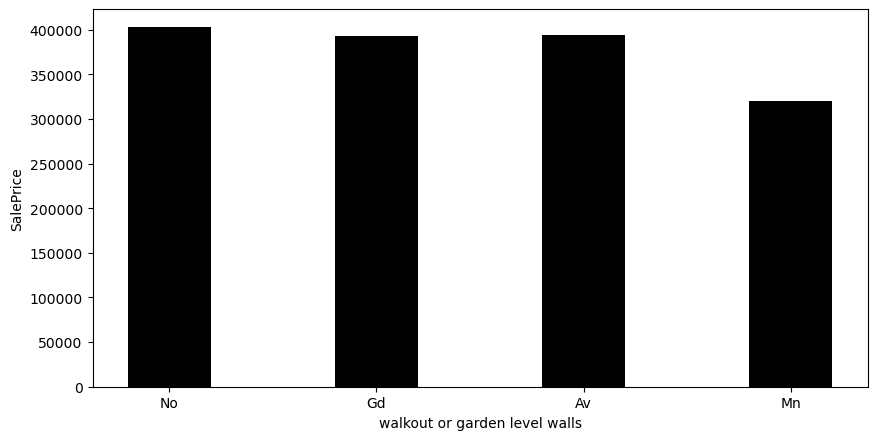

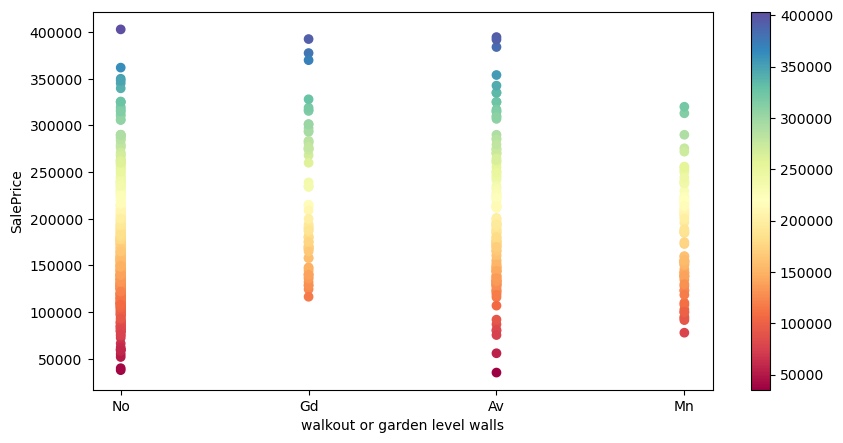

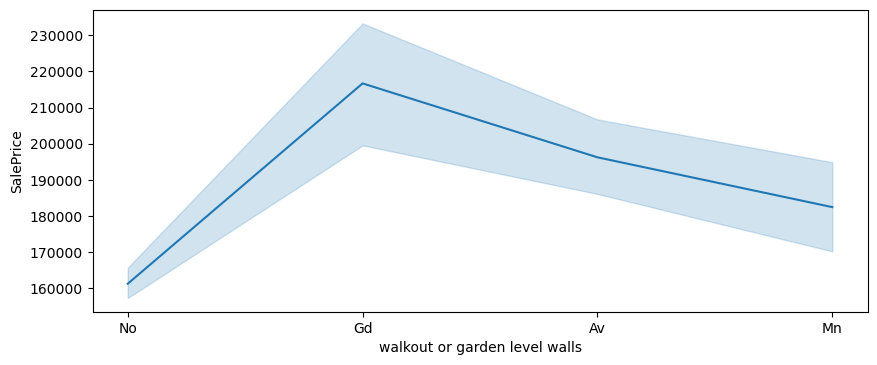

Text(0.5, 1.0, 'walkout or garden level walls')

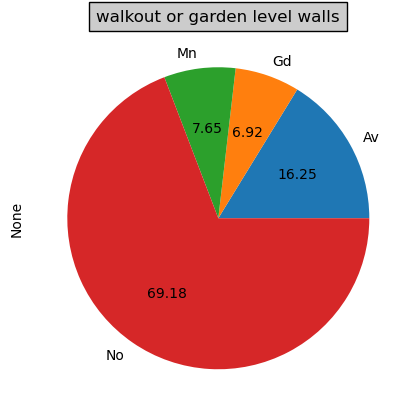

In [106]:
x =df["walkout or garden level walls"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("walkout or garden level walls")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('walkout or garden level walls')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="walkout or garden level walls",y="SalePrice",data=df)
plt.show()

df.groupby('walkout or garden level walls').size().plot(kind='pie', autopct='%.2f')
plt.title("walkout or garden level walls",bbox={'facecolor':'0.8', 'pad':5})

Maximum houses have no exposure to walkouts or gardens, but maximum sale price is for good exposure to it

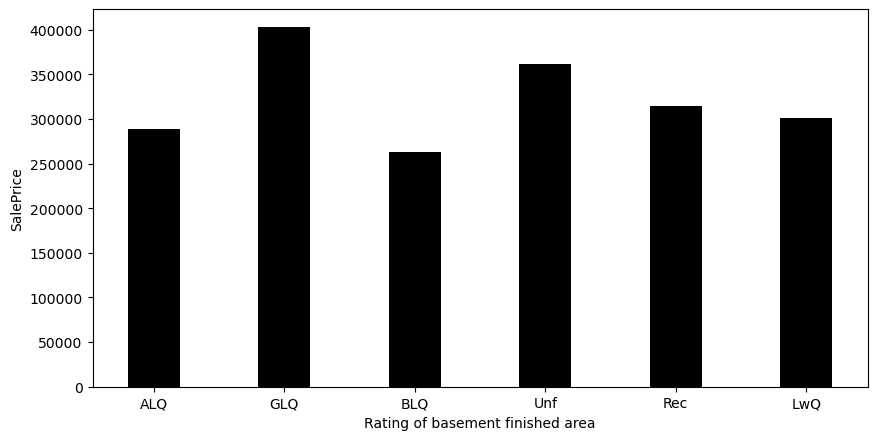

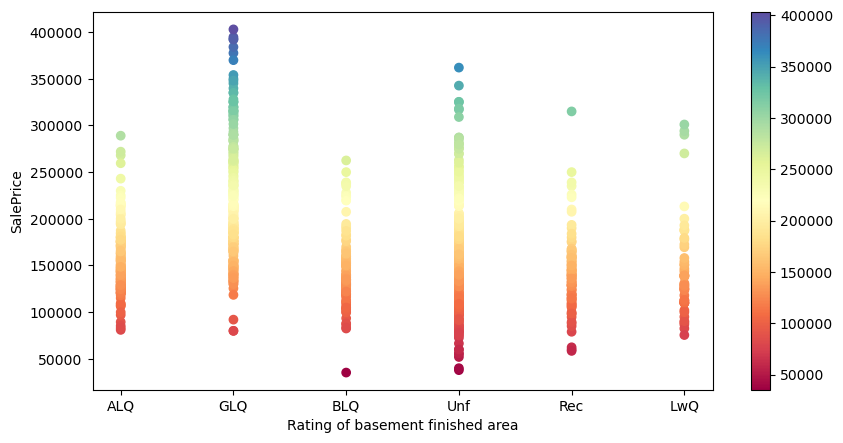

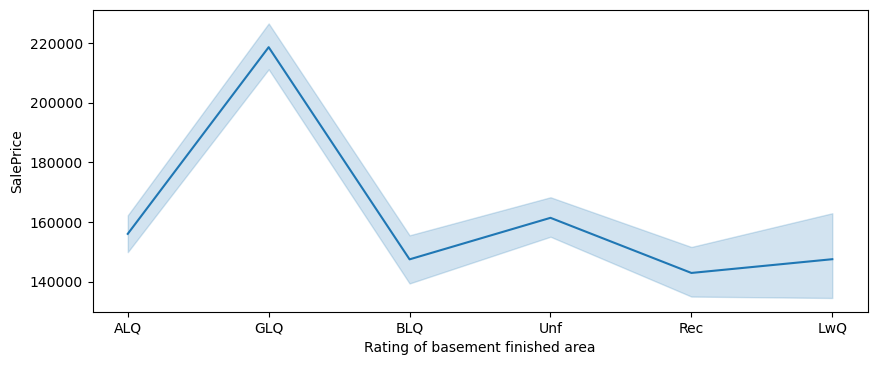

Text(0.5, 1.0, 'Rating of basement finished area')

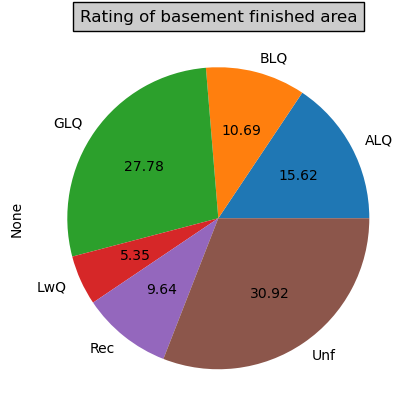

In [107]:
x =df["Rating of basement finished area"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Rating of basement finished area")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Rating of basement finished area')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Rating of basement finished area",y="SalePrice",data=df)
plt.show()

df.groupby('Rating of basement finished area').size().plot(kind='pie', autopct='%.2f')
plt.title("Rating of basement finished area",bbox={'facecolor':'0.8', 'pad':5})

Maximum number of houses have basements unfinished, but the maximum sale price is for the houses which are good living quaters

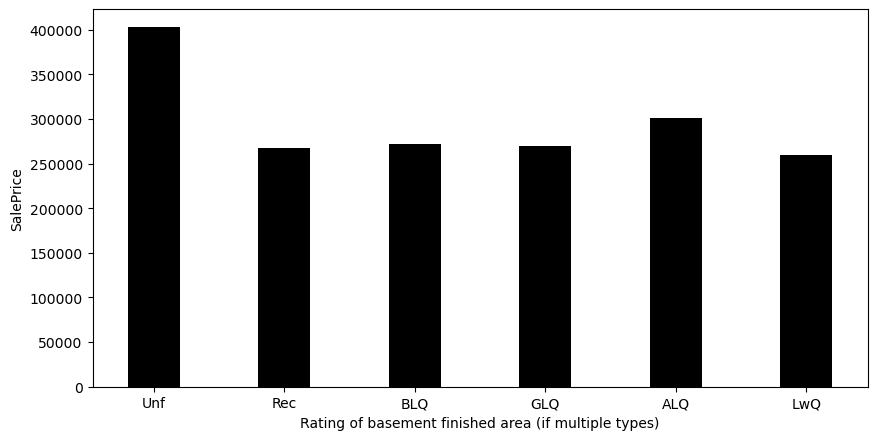

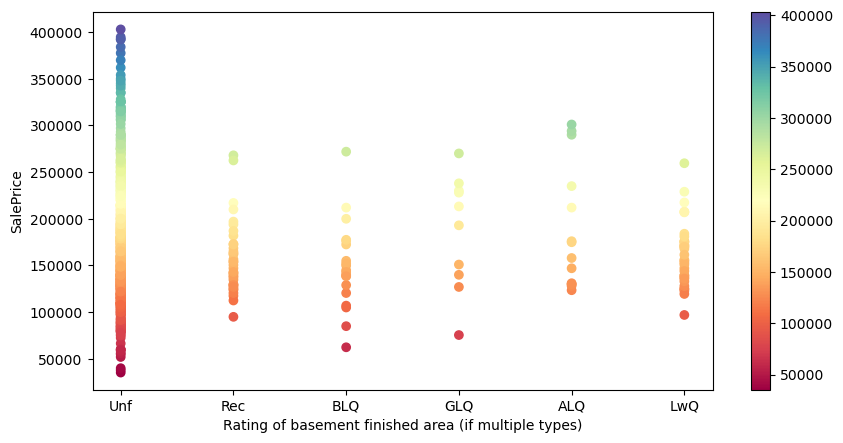

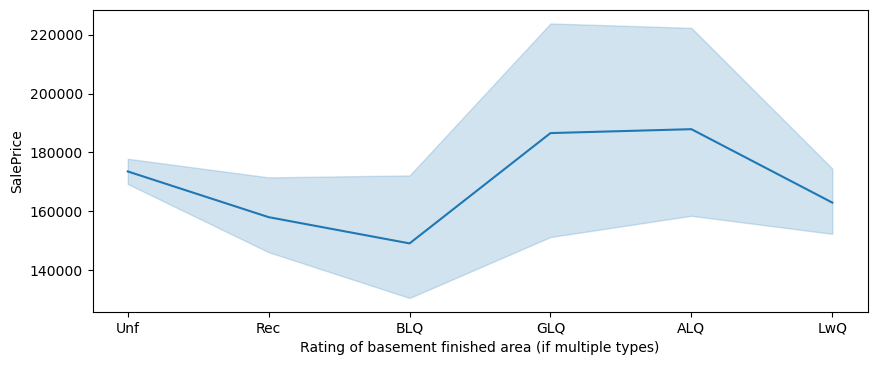

Text(0.5, 1.0, 'Rating of basement finished area (if multiple types)')

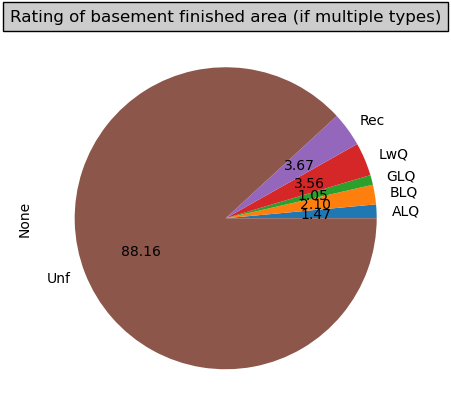

In [108]:
#Rating of basement finished area (if multiple types)

x =df["Rating of basement finished area (if multiple types)"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Rating of basement finished area (if multiple types)")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Rating of basement finished area (if multiple types)')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Rating of basement finished area (if multiple types)",y="SalePrice",data=df)
plt.show()

df.groupby('Rating of basement finished area (if multiple types)').size().plot(kind='pie', autopct='%.2f')
plt.title("Rating of basement finished area (if multiple types)",bbox={'facecolor':'0.8', 'pad':5})

1.Maximum houses have their basements unfinished

2.Sale price is maximum for good living quaters and average living quaters